In [1665]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pandas as pd
from pandas import Timestamp
from datetime import datetime, timedelta
import pandas as pd

In [1666]:
import pyodbc

In [1667]:
import sys
sys.path

['/home/autumn/Attrition_Batch/variable_creation',
 '/var/anaconda3/lib/python38.zip',
 '/var/anaconda3/lib/python3.8',
 '/var/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/autumn/.local/lib/python3.8/site-packages',
 '/var/anaconda3/lib/python3.8/site-packages',
 '/var/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/home/autumn/.ipython']

In [1668]:
valid_active = pd.read_csv('/home/autumn/Attrition_Batch/Data/final_valid_active.csv', sep='\t', encoding='utf-8')

In [1669]:
valid_attritor = pd.read_csv('/home/autumn/Attrition_Batch/Data/final_valid_attritors.csv', sep='\t', encoding='utf-8')

In [1670]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

In [1671]:
server = 'fidosqldb.risk.regn.net,50750'
database = 'red' # enter database name
username = 'pasl_fidoanalytics'
password = 'H8o0T1saPuC' # add appropriate driver name


## Part A: Usage and product information

### Step1: Usage/Product info: Active Accounts 

In [8]:
username = 'pasl_fidoanalytics'
password = 'H8o0T1saPuC' # add appropriate driver name
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

query = ''' 

select u.year_month, u.customer_account_sk,
ca.subaccount_attrition_year_month, ca.subaccount_status, ca.src_create_dt, u.product_sk, p.platform_cd,
count(distinct u.contact_sk) as total_contacts,
sum(u.searches) as total_searches 
from dim_customer_account ca
left join fact_usage u on u.customer_account_sk =  ca.customer_account_sk
left join dim_platform p on p.mbs_product_id = ca.mbs_product_id
where u.year_month > 201809 and u.year_month <= 202009
and ca.customer_account_sk in ('67631',
'67758',
'67858',
'67913',
'68298',
'68315',
'68700',
'69484',
'69651',
'69888',
'69981',
'70178',
'70216',
'70349',
'70402',
'70406',
'70420',
'70594',
'71863',
'71880',
'71936',
'71968',
'72076',
'72281',
'72908',
'73970',
'73999',
'74024',
'74261',
'74337',
'74573',
'74677',
'75445',
'75467',
'75475',
'75499',
'75504',
'75518',
'75636',
'75829',
'76050',
'76083',
'76131',
'76244',
'76284',
'76622',
'76630',
'77934',
'78178',
'78339',
'78716',
'78742',
'79602',
'79620',
'79623',
'79633',
'79638',
'79814',
'80165',
'80298',
'80394',
'80403',
'80459',
'80787',
'80840',
'82124',
'82671',
'83743',
'83778',
'83783',
'83805',
'83806',
'84626',
'86257',
'86597',
'87000',
'87101',
'87919',
'87976',
'87979',
'87985',
'88806',
'88910',
'89001',
'90773',
'91097',
'91162',
'91178',
'92143',
'92734',
'92812',
'93321',
'93612',
'93671',
'93855',
'94291',
'94671',
'94875',
'95315',
'96236',
'96243',
'96244',
'96896',
'96917',
'97057',
'97117',
'97148',
'98295',
'98410',
'98863',
'98985',
'99057',
'99320',
'99581',
'100390',
'100404',
'100406',
'100450',
'100773',
'100985',
'101113',
'101130',
'101196',
'102032',
'102531',
'103504',
'103600',
'104647',
'104668',
'104699',
'104704',
'105282',
'105330',
'105506',
'105554',
'105556',
'105792',
'106042',
'106348',
'106923',
'107790',
'107848',
'108887',
'108889',
'108902',
'108915',
'108916',
'108945',
'109683',
'109873',
'109980',
'110271',
'111070',
'111350',
'111677',
'111777',
'111885',
'111969',
'112000',
'112018',
'112033',
'112063',
'112073',
'113062',
'113078',
'113669',
'113740',
'113845',
'113982',
'114197',
'115634',
'115682',
'115715',
'115826',
'115986',
'116159',
'116221',
'116238',
'116474',
'117272',
'117284',
'117289',
'117295',
'117865',
'118154',
'118345',
'118724',
'120415',
'120818',
'121496',
'121527',
'122101',
'122271',
'122374',
'122434',
'122914',
'122938',
'122968',
'123452',
'124465',
'124523',
'124697',
'124807',
'124898',
'125687',
'125708',
'125719',
'125734',
'126297',
'126413',
'126470',
'126707',
'127045',
'127218',
'128117',
'128336',
'128646',
'128905',
'128962',
'129012',
'129822',
'129851',
'129895',
'130445',
'130611',
'130659',
'130869',
'131119',
'131214',
'131931',
'132848',
'133000',
'133148',
'133930',
'133942',
'133980',
'134511',
'134568',
'134829',
'134836',
'135116',
'135667',
'137028',
'137314',
'138081',
'138131',
'138134',
'138691',
'138771',
'139200',
'140713',
'140942',
'141116',
'141170',
'141330',
'142240',
'142274',
'142293',
'142645',
'142876',
'142973',
'143002',
'143103',
'143674',
'144002',
'144403',
'145377',
'146394',
'146438',
'146443',
'146770',
'147095',
'147096',
'147129',
'147184',
'147198',
'148197',
'148945',
'148963',
'149030',
'149482',
'149509',
'150607',
'151112',
'151114',
'151804',
'151957',
'152413',
'152664',
'152966',
'153053',
'153389',
'153412',
'154649',
'155241',
'155244',
'155264',
'155549',
'156020',
'156227',
'157213',
'157275',
'157424',
'157597',
'157623',
'157771',
'157977',
'158039',
'158773',
'158815',
'159016',
'159191',
'159685',
'159890',
'160031',
'160119',
'160437',
'160472',
'160777',
'161197',
'161442',
'161540',
'161541',
'161748',
'161955',
'162985',
'163029',
'163721',
'163763',
'164162',
'164487',
'164660',
'164923',
'165389',
'165863',
'166000',
'166109',
'166283',
'167177',
'167215',
'167228',
'167823',
'167846',
'167966',
'168076',
'168177',
'168552',
'169562',
'169767',
'170251',
'171366',
'171368',
'171418',
'171571',
'171752',
'171978',
'172079',
'173018',
'173708',
'174421',
'174568',
'174701',
'175587',
'175622',
'176195',
'176320',
'176497',
'177811',
'177933',
'178385',
'178500',
'179741',
'179743',
'179749',
'179752',
'179765',
'179769',
'179771',
'181185',
'182183',
'182339',
'182558',
'183021',
'183050',
'183848',
'184103',
'184486',
'184667',
'184704',
'184913',
'185415',
'187013',
'187046',
'188146',
'188184',
'188753',
'188773',
'188825',
'188994',
'189231',
'190518',
'191316',
'191471',
'191568',
'192292',
'192293',
'192342',
'192372',
'192373',
'192916',
'193112',
'193198',
'193223',
'193662',
'193930',
'194813',
'194830',
'194860',
'195098',
'195178',
'195329',
'195338',
'195472',
'195622',
'196564',
'197102',
'197124',
'197578',
'198660',
'199578',
'199632',
'199638',
'199738',
'200718',
'200719',
'200742',
'200765',
'201072',
'201296',
'201336',
'201508',
'201623',
'201964',
'202001',
'202047',
'202132',
'203741',
'203952',
'204032',
'204915',
'205469',
'205574',
'205796',
'206617',
'207408',
'207898',
'208135',
'208245',
'209112',
'209142',
'209154',
'209796',
'210370',
'210480',
'211675',
'211911',
'212069',
'212166',
'212305',
'212442',
'212554',
'213270',
'213277',
'213282',
'213339',
'213912',
'213943',
'213986',
'214372',
'214716',
'216359',
'216841',
'217502',
'217516',
'217519',
'217532',
'217541',
'217544',
'217546',
'217547',
'217553',
'217865',
'218188',
'218301',
'218388',
'218472',
'219629',
'219881',
'219952',
'219980',
'220067',
'220262',
'220497',
'220533',
'220801',
'220817',
'221620',
'221658',
'222209',
'222248',
'222390',
'222403',
'222417',
'222455',
'222699',
'224026',
'224209',
'224329',
'224739',
'224766',
'224869',
'225815',
'225825',
'225844',
'225851',
'226410',
'226695',
'228219',
'228387',
'228450',
'228671',
'228930',
'229155',
'229200',
'230082',
'230088',
'230089',
'230093',
'230101',
'230118',
'230246',
'230712',
'231759',
'233118',
'233181',
'233461',
'234229',
'234240',
'234259',
'234261',
'234488',
'235078',
'235162',
'235166',
'235656',
'236422',
'236813',
'237471',
'237831',
'238472',
'238475',
'238518',
'238863',
'239224',
'241450',
'241467',
'241508',
'241626',
'241636',
'242136',
'242764',
'242813',
'242814',
'243133',
'243364',
'243451',
'243591',
'244275',
'244564',
'245376',
'245709',
'246144',
'246930',
'246950',
'246952',
'246959',
'247543',
'247546',
'247665',
'247688',
'247761',
'247769',
'247850',
'248827',
'249089',
'249515',
'249796',
'251137',
'251143',
'251194',
'251375',
'251915',
'251993',
'252056',
'252313',
'252518',
'252578',
'253628',
'253862',
'254275',
'254322',
'255295',
'255324',
'255340',
'255375',
'255927',
'256021',
'256698',
'256772',
'256800',
'256926',
'256973',
'257801',
'257826',
'257830',
'258498',
'259763',
'260103',
'260131',
'260149',
'260204',
'260285',
'260292',
'260341',
'260413',
'260467',
'260599',
'260833',
'261388',
'261402',
'261942',
'261989',
'262303',
'262917',
'263027',
'263705',
'263727',
'263731',
'263741',
'264110',
'264537',
'264551',
'264595',
'264672',
'264721',
'264868',
'264990',
'265039',
'266391',
'266532',
'266599',
'266625',
'266787',
'267883',
'267909',
'267914',
'267947',
'267974',
'268289',
'268593',
'268731',
'268932',
'269248',
'270390',
'270504',
'270567',
'271154',
'271291',
'272161',
'272172',
'272211',
'272812',
'274109',
'274692',
'275053',
'275192',
'275316',
'275390',
'275509',
'276441',
'668738',
'668874',
'709455',
'710187',
'710746',
'712146',
'762754',
'816893',
'824117',
'827379',
'827474',
'830064',
'831156',
'833925',
'833996',
'835260',
'840359',
'840558',
'842196',
'842920',
'842941',
'845184',
'846006',
'846554',
'846611',
'847467',
'849408',
'850959',
'851508',
'852166',
'852608',
'854020',
'854642',
'856876',
'857041',
'857250',
'858307',
'858438',
'860512',
'865350',
'865961',
'866431',
'866464',
'869559',
'901909',
'903234',
'907511',
'907526',
'907537',
'908261',
'915173',
'915226',
'916406',
'916417',
'916424',
'916630',
'918856',
'926652',
'926875',
'930177',
'931622',
'937472',
'939374',
'944913',
'945025',
'945418',
'945484',
'945923',
'945940',
'953642',
'953875',
'954564',
'955344',
'955851',
'956228',
'957012',
'957665',
'957820',
'959255',
'959778',
'960654',
'961627',
'961762',
'963363',
'964610',
'965250',
'966966',
'967280',
'967367',
'967914',
'968262',
'969164',
'976781',
'977406',
'980949',
'982441',
'983413',
'989067',
'989069',
'989207',
'995969',
'997010',
'999317',
'999728',
'1005256',
'1006888',
'1008310',
'1010364',
'1012727',
'1016514',
'1018757',
'1018896',
'1019039',
'1019621',
'1021088',
'1021122',
'1024319',
'1025551',
'1026785',
'1028607',
'1029712',
'1032152',
'1033749',
'1036026',
'1044943',
'1046895',
'1046933',
'1047756',
'1051134',
'1051206',
'1053301',
'1054099',
'1054245',
'1055823',
'1056209',
'1056426',
'1056684',
'1058685',
'1060009',
'1061864',
'1063863',
'1064944',
'1065378',
'1067172',
'1067608',
'1067680',
'1070068',
'1071540',
'1072162',
'1072184',
'1072625',
'1072853',
'1072909',
'1080797',
'1082369',
'1082959',
'1087320',
'1088418',
'1097436',
'1099025',
'1105242',
'1110508',
'1115198',
'1117881',
'1122268',
'1122516',
'1122991',
'1123569',
'1124375',
'1125093',
'1125429',
'1127332',
'1127791',
'1128065',
'1132713',
'1133732',
'1136523',
'1137208',
'1139838',
'1145276',
'1146316',
'1147227',
'1147467',
'1148961',
'1153691',
'1163651',
'1164008',
'1165296',
'1172318',
'1172386',
'1173238',
'1177604',
'1189878',
'1192061',
'1195237',
'1201950',
'1211653',
'1216848',
'1219668',
'1221007',
'1221053',
'1222886',
'1225701',
'1227848',
'1232529',
'1234303',
'1234658',
'1241784',
'1243369',
'1244289',
'1245300',
'1245791',
'1245799',
'1248680',
'1250227',
'1251506',
'1253201',
'1263115',
'1263573',
'1266144',
'1271880',
'1272034',
'1278681',
'1370901',
'1373126',
'1375871',
'1376222',
'1378633',
'1379648',
'1381954',
'1384831',
'1386135',
'1388224',
'1388237',
'1388299',
'1389797',
'1389892',
'1390414',
'1390479',
'1390512',
'1390513',
'1390948',
'1390984',
'1391111',
'1391236',
'1391296',
'1391368',
'1391401',
'1393120',
'1398280',
'1406642',
'1411718',
'1414009',
'1414688',
'1414735',
'1415514',
'1415553',
'1415892',
'1418804',
'1419165',
'1419427',
'1421687',
'1421889',
'1423081',
'1423811',
'1426044',
'1429651',
'1441093',
'1442294',
'1445969',
'1454011',
'1455736',
'1455797',
'1457057',
'1458015',
'1461414',
'1462865',
'1471840',
'1471931',
'1473950',
'1475432',
'1485629',
'1486186',
'1487038',
'1488968',
'1494168',
'1495058',
'1515671',
'1518095',
'1519419',
'1525154',
'1525926',
'1527648',
'1527936',
'1528369',
'1529910',
'1532691',
'1532964',
'1535875',
'1536359',
'1542053',
'1551491',
'1552518',
'1553207',
'1556147',
'1565719',
'1566971',
'1567239',
'1567916',
'1569176',
'1569539',
'1573631',
'1575955',
'1577742',
'1578149',
'1579862',
'1583272',
'1591033',
'1591252',
'1599244',
'1601785',
'1602235',
'1604784',
'1606459',
'1607912',
'1608824',
'1610372',
'1611938',
'1616291',
'1617321',
'1619303',
'1624118',
'1630356',
'1636662',
'1643354',
'1647293',
'1649322',
'1657656',
'1670288',
'1671620',
'1672738',
'1675548',
'1675870',
'1675957',
'1676125',
'1678059',
'1680893',
'1684005',
'1688060',
'1688233',
'1688365',
'1688470',
'1688507',
'1688865',
'1688904',
'1689136',
'1694462',
'1695072',
'1696519',
'1697890',
'1702054',
'1702676',
'1704243',
'1704920',
'1705207',
'1705614',
'1706785',
'1708632',
'1713457',
'1716677',
'1718766',
'1722714',
'1725699',
'1725899',
'1732408',
'1739329',
'1742364',
'1743528',
'1743603',
'1745815',
'1746395',
'1747514',
'1749917',
'1759297',
'1761760',
'1768615',
'1774327',
'1776081')
group by u.year_month, u.customer_account_sk,ca.subaccount_attrition_year_month, ca.subaccount_status, ca.src_create_dt, u.product_sk, p.platform_cd

''';

hide_toggle()


In [9]:
active_usage_monthly = pd.read_sql(query, cnxn)
active_usage_monthly.head()

,year_month,customer_account_sk,subaccount_attrition_year_month,subaccount_status,src_create_dt,product_sk,platform_cd,total_contacts,total_searches
0,201912,916406,0,Active,20140911,121,CRP,56,4210.0
1,201901,266625,0,Active,20080717,121,ACC,9,3250.0
2,202006,234488,0,Active,20120222,12,CRP,26,408.0
3,202008,1006888,0,Active,20150901,12,CRP,3,153.0
4,202004,230088,0,Active,20020131,16,BNK,1,252.0


In [10]:
len(active_usage_monthly['customer_account_sk'].unique())

1077

### Step 2. Usage/Prodct Info: Attrited accounts 

In [11]:
username = 'pasl_fidoanalytics'
password = 'H8o0T1saPuC' # add appropriate driver name
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

query = ''' 

select u.year_month, u.customer_account_sk,
ca.subaccount_attrition_year_month, ca.subaccount_status, ca.src_create_dt,u.product_sk,p.platform_cd,
count(distinct u.contact_sk) as total_contacts,
sum(u.searches) as total_searches


from dim_customer_account ca
left join fact_usage u on u.customer_account_sk =  ca.customer_account_sk
left join dim_platform p on p.mbs_product_id = ca.mbs_product_id
where u.year_month > 201609 and u.year_month <= 202009
and ca.customer_account_sk in ('71251',
'71997',
'72033',
'74365',
'74383',
'75465',
'77304',
'79629',
'82635',
'82809',
'83775',
'85104',
'88666',
'90541',
'92158',
'92725',
'94591',
'94897',
'98336',
'99157',
'99552',
'99561',
'100372',
'101188',
'101243',
'103858',
'120571',
'123496',
'124360',
'127530',
'128398',
'129023',
'130484',
'130713',
'132609',
'133960',
'133979',
'138141',
'140836',
'142273',
'142296',
'146436',
'148228',
'149000',
'149629',
'150577',
'151170',
'151470',
'153517',
'155521',
'157847',
'157888',
'162192',
'165613',
'166094',
'166217',
'167180',
'168238',
'168690',
'170362',
'171362',
'172103',
'178903',
'180395',
'181943',
'183046',
'183082',
'183871',
'183923',
'186828',
'186975',
'188145',
'188489',
'192316',
'192367',
'196569',
'197261',
'201848',
'204881',
'204908',
'205900',
'206181',
'206281',
'207974',
'208216',
'212034',
'212275',
'212415',
'213304',
'220399',
'220603',
'224789',
'225849',
'228659',
'228778',
'228920',
'229026',
'237389',
'241199',
'242792',
'245461',
'247666',
'250166',
'252190',
'255382',
'256451',
'258630',
'259575',
'262684',
'266861',
'271183',
'272228',
'273131',
'672585',
'823305',
'825006',
'830086',
'847839',
'848811',
'851776',
'862566',
'865110',
'871406',
'901426',
'902619',
'903194',
'905463',
'912511',
'917388',
'922422',
'924368',
'924618',
'931419',
'934253',
'935259',
'937680',
'938852',
'941928',
'946223',
'948508',
'951066',
'953339',
'961346',
'968058',
'984585',
'998099',
'1011402',
'1022280',
'1024726',
'1029214',
'1032126',
'1035925',
'1038411',
'1051933',
'1052003',
'1060633',
'1064443',
'1067463',
'1068274',
'1079596',
'1088492',
'1089864',
'1090677',
'1091387',
'1094487',
'1102942',
'1103464',
'1103830',
'1109137',
'1122723',
'1127236',
'1127806',
'1132380',
'1132738',
'1134256',
'1143577',
'1144460',
'1149169',
'1165177',
'1165775',
'1165896',
'1180328',
'1186086',
'1189150',
'1201022',
'1206896',
'1250909',
'1265154',
'1269925',
'1276301',
'1366221',
'1371849',
'1372280',
'1390985',
'1411236',
'1416002',
'1416814',
'1424183',
'1427152',
'1455612',
'1483954',
'1485485',
'1519678',
'1525738',
'1526703',
'1528272',
'1528692',
'1547213',
'1547356',
'1553824',
'1554947',
'1558569',
'1562855',
'1565623',
'1582695',
'1585859',
'1586183',
'1608884',
'1625787',
'1715389')

group by u.year_month, u.customer_account_sk,  ca.subaccount_attrition_year_month, ca.subaccount_status,ca.src_create_dt,u.product_sk,p.platform_cd
''';

hide_toggle()


In [12]:
attritor_usage_monthly = pd.read_sql(query, cnxn)
len(attritor_usage_monthly['customer_account_sk'].unique())

220

In [13]:
attritor_usage_monthly.head()

,year_month,customer_account_sk,subaccount_attrition_year_month,subaccount_status,src_create_dt,product_sk,platform_cd,total_contacts,total_searches
0,201709,188145,201907,Terminated,20120914,16,BNK,1,9.0
1,201806,1127236,201909,Terminated,20160831,3,ACC,1,9687.0
2,201702,72033,202002,Terminated,20011129,121,CRP,4,24803.0
3,201805,212415,201810,Terminated,20110919,3,ACC,1,3307.0
4,201801,266861,201911,Terminated,20120702,121,ACC,8,6408.0


### 1.2 Start combining the active account and attritors 
#### Note: Need to assign 201910 as attrition date for all the active accounts

In [14]:
usage_active2 = active_usage_monthly

In [15]:
usage_active2['acct_status'] = ['active']*usage_active2.shape[0] 

In [16]:
usage_active2['attrition_dt'] = ['202009']*usage_active2.shape[0] 

In [17]:
usage_active2.head()

,year_month,customer_account_sk,subaccount_attrition_year_month,subaccount_status,src_create_dt,product_sk,platform_cd,total_contacts,total_searches,acct_status,attrition_dt
0,201912,916406,0,Active,20140911,121,CRP,56,4210.0,active,202009
1,201901,266625,0,Active,20080717,121,ACC,9,3250.0,active,202009
2,202006,234488,0,Active,20120222,12,CRP,26,408.0,active,202009
3,202008,1006888,0,Active,20150901,12,CRP,3,153.0,active,202009
4,202004,230088,0,Active,20020131,16,BNK,1,252.0,active,202009


In [18]:
usage_attritors2 = attritor_usage_monthly

In [19]:
usage_attritors2['acct_status'] = ['attritor']*usage_attritors2.shape[0]  

In [20]:
usage_attritors2['attrition_dt'] = usage_attritors2['subaccount_attrition_year_month']

In [21]:
usage_attritors2.head()

,year_month,customer_account_sk,subaccount_attrition_year_month,subaccount_status,src_create_dt,product_sk,platform_cd,total_contacts,total_searches,acct_status,attrition_dt
0,201709,188145,201907,Terminated,20120914,16,BNK,1,9.0,attritor,201907
1,201806,1127236,201909,Terminated,20160831,3,ACC,1,9687.0,attritor,201909
2,201702,72033,202002,Terminated,20011129,121,CRP,4,24803.0,attritor,202002
3,201805,212415,201810,Terminated,20110919,3,ACC,1,3307.0,attritor,201810
4,201801,266861,201911,Terminated,20120702,121,ACC,8,6408.0,attritor,201911


In [22]:
frames = [usage_active2, usage_attritors2] ### combine active and attritors

In [23]:
usage1 = pd.concat(frames, sort=False)
usage = pd.DataFrame(usage1).fillna(0)

In [24]:
len(usage['customer_account_sk'].unique())

1297

## Step2: start creating usage varibles
### 2.1: create a 2 months gap before attition date for all accounts

In [25]:
first_day = ['01']*usage.shape[0] 

In [26]:
year_month_date = usage['year_month'].astype(str) + first_day

In [27]:
usage['activity_year_month_dt'] = year_month_date.apply(lambda x: datetime.strptime(x, '%Y%m%d') if x != '001' else '-2')

In [28]:
attrition_date = usage['attrition_dt'].astype(str) + first_day

In [29]:
usage['attrition_date'] = attrition_date.apply(lambda x: datetime.strptime(x, '%Y%m%d') if x != '01' else '-2')

In [30]:
usage['src_create_date'] = usage['src_create_dt'].astype(str).apply(lambda x: datetime.strptime(x, '%Y%m%d') if x != '001' else '-2')

In [31]:
usage.head()

,year_month,customer_account_sk,subaccount_attrition_year_month,subaccount_status,src_create_dt,product_sk,platform_cd,total_contacts,total_searches,acct_status,attrition_dt,activity_year_month_dt,attrition_date,src_create_date
0,201912,916406,0,Active,20140911,121,CRP,56,4210.0,active,202009,2019-12-01,2020-09-01,2014-09-11
1,201901,266625,0,Active,20080717,121,ACC,9,3250.0,active,202009,2019-01-01,2020-09-01,2008-07-17
2,202006,234488,0,Active,20120222,12,CRP,26,408.0,active,202009,2020-06-01,2020-09-01,2012-02-22
3,202008,1006888,0,Active,20150901,12,CRP,3,153.0,active,202009,2020-08-01,2020-09-01,2015-09-01
4,202004,230088,0,Active,20020131,16,BNK,1,252.0,active,202009,2020-04-01,2020-09-01,2002-01-31


In [32]:
usage['gap_prior_2mos_attrition'] = usage['attrition_date']- pd.DateOffset(months=2)

In [33]:
## Detect active usage

In [34]:
usage['days_on_books'] = (usage['gap_prior_2mos_attrition'] - usage['src_create_date'])

In [35]:
usage['days_on_books']

0       2120 days
1       4367 days
2       3052 days
3       1765 days
4       6726 days
           ...   
10828   3419 days
10829   1279 days
10830   3306 days
10831   3663 days
10832   6645 days
Name: days_on_books, Length: 58443, dtype: timedelta64[ns]

In [36]:
usage.head()

,year_month,customer_account_sk,subaccount_attrition_year_month,subaccount_status,src_create_dt,product_sk,platform_cd,total_contacts,total_searches,acct_status,attrition_dt,activity_year_month_dt,attrition_date,src_create_date,gap_prior_2mos_attrition,days_on_books
0,201912,916406,0,Active,20140911,121,CRP,56,4210.0,active,202009,2019-12-01,2020-09-01,2014-09-11,2020-07-01,2120 days
1,201901,266625,0,Active,20080717,121,ACC,9,3250.0,active,202009,2019-01-01,2020-09-01,2008-07-17,2020-07-01,4367 days
2,202006,234488,0,Active,20120222,12,CRP,26,408.0,active,202009,2020-06-01,2020-09-01,2012-02-22,2020-07-01,3052 days
3,202008,1006888,0,Active,20150901,12,CRP,3,153.0,active,202009,2020-08-01,2020-09-01,2015-09-01,2020-07-01,1765 days
4,202004,230088,0,Active,20020131,16,BNK,1,252.0,active,202009,2020-04-01,2020-09-01,2002-01-31,2020-07-01,6726 days


### 2.2: Set up the date gap flag: any activity date < the prior_2mos_attrition_date IS valid, so that we can have 2 months gap before attrition.
### For example, if the attriiton date is 2020/10/01, 2 months before attrition date is 2020/07/01. 2020/08/01 to 2020/10/01 will be excluded 

In [37]:
### 2.3: Create time moving window for 3 months/6 months/9 months/12 months before attrition gap(2 months before attrition)

In [38]:
usage['moving_3mos_b4_gap'] = usage['gap_prior_2mos_attrition']- pd.DateOffset(months=3)

In [39]:
usage['moving_6mos_b4_gap'] = usage['gap_prior_2mos_attrition']- pd.DateOffset(months=6)

In [40]:
usage['moving_9mos_b4_gap'] = usage['gap_prior_2mos_attrition']- pd.DateOffset(months=9)

In [41]:
usage['moving_12mos_b4_gap'] = usage['gap_prior_2mos_attrition']- pd.DateOffset(months=12)

In [42]:
### 2.4: create sum of usage/active users for 3 months, 6 months, 9 months and 12 months 

In [43]:
usage['flag_3mos'] =  list(map(lambda x, y, z: 'valid'\
                                          if ((z <= x) \
                                          and( z> y)) else 'invalid', \
                                          usage['gap_prior_2mos_attrition'], \
                                          usage['moving_3mos_b4_gap'], \
                                          usage['activity_year_month_dt']
                                         ))

In [44]:
usage['flag_6mos'] =  list(map(lambda x, y, z: 'valid'\
                                          if ((z <= x) \
                                          and( z> y)) else 'invalid', \
                                          usage['gap_prior_2mos_attrition'], \
                                          usage['moving_6mos_b4_gap'], \
                                          usage['activity_year_month_dt']
                                         ))

In [45]:
usage['flag_9mos'] =  list(map(lambda x, y, z: 'valid'\
                                          if ((z <= x) \
                                          and( z> y)) else 'invalid', \
                                          usage['gap_prior_2mos_attrition'], \
                                          usage['moving_9mos_b4_gap'], \
                                          usage['activity_year_month_dt']
                                         ))

In [46]:
usage['flag_12mos'] =  list(map(lambda x, y, z: 'valid'\
                                          if ((z <= x) \
                                          and( z> y)) else 'invalid', \
                                          usage['gap_prior_2mos_attrition'], \
                                          usage['moving_12mos_b4_gap'], \
                                          usage['activity_year_month_dt']
                                         ))

In [47]:
usage.head()

,year_month,customer_account_sk,subaccount_attrition_year_month,subaccount_status,src_create_dt,product_sk,platform_cd,total_contacts,total_searches,acct_status,...,gap_prior_2mos_attrition,days_on_books,moving_3mos_b4_gap,moving_6mos_b4_gap,moving_9mos_b4_gap,moving_12mos_b4_gap,flag_3mos,flag_6mos,flag_9mos,flag_12mos
0,201912,916406,0,Active,20140911,121,CRP,56,4210.0,active,...,2020-07-01,2120 days,2020-04-01,2020-01-01,2019-10-01,2019-07-01,invalid,invalid,valid,valid
1,201901,266625,0,Active,20080717,121,ACC,9,3250.0,active,...,2020-07-01,4367 days,2020-04-01,2020-01-01,2019-10-01,2019-07-01,invalid,invalid,invalid,invalid
2,202006,234488,0,Active,20120222,12,CRP,26,408.0,active,...,2020-07-01,3052 days,2020-04-01,2020-01-01,2019-10-01,2019-07-01,valid,valid,valid,valid
3,202008,1006888,0,Active,20150901,12,CRP,3,153.0,active,...,2020-07-01,1765 days,2020-04-01,2020-01-01,2019-10-01,2019-07-01,invalid,invalid,invalid,invalid
4,202004,230088,0,Active,20020131,16,BNK,1,252.0,active,...,2020-07-01,6726 days,2020-04-01,2020-01-01,2019-10-01,2019-07-01,invalid,valid,valid,valid


In [48]:
### 2.4: create sum of usage/active users for 3 months, 6 months, 9 months

In [49]:
#### 2.4-a: 3 months sum statistics for 3 months usages/active users

In [50]:
### need to group by year_month and sub_account_sk, because some accounts have two products_sk, or multiple platforms 

In [51]:
only_usage= pd.DataFrame(usage.pivot_table(index=['customer_account_sk', 'year_month', 'gap_prior_2mos_attrition','moving_3mos_b4_gap'
                                                 ,'moving_6mos_b4_gap','moving_9mos_b4_gap','flag_3mos','flag_6mos','flag_9mos'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['total_searches'],
               aggfunc={'total_searches':np.sum}))

only_usage.columns= ['total_searches']
monthly_usage = only_usage.reset_index()
monthly_usage.head()

,customer_account_sk,year_month,gap_prior_2mos_attrition,moving_3mos_b4_gap,moving_6mos_b4_gap,moving_9mos_b4_gap,flag_3mos,flag_6mos,flag_9mos,total_searches
0,67631,201810,2020-07-01,2020-04-01,2020-01-01,2019-10-01,invalid,invalid,invalid,23946.0
1,67631,201811,2020-07-01,2020-04-01,2020-01-01,2019-10-01,invalid,invalid,invalid,26834.0
2,67631,201812,2020-07-01,2020-04-01,2020-01-01,2019-10-01,invalid,invalid,invalid,29650.0
3,67631,201901,2020-07-01,2020-04-01,2020-01-01,2019-10-01,invalid,invalid,invalid,25194.0
4,67631,201902,2020-07-01,2020-04-01,2020-01-01,2019-10-01,invalid,invalid,invalid,25152.0


In [52]:
monthly_usage['usage_3mths_flags'] = list(map(lambda x, y: 1\
                                          if (x > 0 and y == 'valid') else 0, \
                                          monthly_usage['total_searches'], \
                                         monthly_usage['flag_3mos']))


In [53]:
monthly_usage['usage_6mths_flags'] = list(map(lambda x, y: 1\
                                          if (x > 0 and y == 'valid') else 0, \
                                          monthly_usage['total_searches'], \
                                         monthly_usage['flag_6mos']))

In [54]:
monthly_usage['usage_9mths_flags'] = list(map(lambda x, y: 1\
                                          if (x > 0 and y == 'valid') else 0, \
                                          monthly_usage['total_searches'], \
                                         monthly_usage['flag_9mos']))

In [55]:
### calculate sum of the active usage flags

In [56]:
active_usage= pd.DataFrame(monthly_usage.pivot_table(index=['customer_account_sk'],
               margins=False,
                values=['usage_3mths_flags', 'usage_6mths_flags', 'usage_9mths_flags'],
               aggfunc={'usage_3mths_flags':np.sum,
                      'usage_6mths_flags':np.sum,
                       'usage_9mths_flags':np.sum}))

active_usage.columns= ['sum_ative_usage_3mths', 'sum_ative_usage_6mths','sum_ative_usage_9mths']
active_usage['active_usage_rate_3mths'] = active_usage['sum_ative_usage_3mths']/3
active_usage['active_usage_rate_6mths'] = active_usage['sum_ative_usage_6mths']/6
active_usage['active_usage_rate_9mths'] = active_usage['sum_ative_usage_9mths']/9
active_usage['zero_usage_rate_3mths'] = (3-active_usage['sum_ative_usage_3mths'])/3
active_usage['zero_usage_rate_6mths'] = (6-active_usage['sum_ative_usage_6mths'])/6
active_usage['zero_usage_rate_9mths'] = (9-active_usage['sum_ative_usage_9mths'])/9
active_usage

,sum_ative_usage_3mths,sum_ative_usage_6mths,sum_ative_usage_9mths,active_usage_rate_3mths,active_usage_rate_6mths,active_usage_rate_9mths,zero_usage_rate_3mths,zero_usage_rate_6mths,zero_usage_rate_9mths
customer_account_sk,,,,,,,,,
67631,1,4,7,0.333333,0.666667,0.777778,0.666667,0.333333,0.222222
67758,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
67858,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
67913,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
68298,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1759297,2,4,7,0.666667,0.666667,0.777778,0.333333,0.333333,0.222222
1761760,3,5,7,1.000000,0.833333,0.777778,0.000000,0.166667,0.222222
1768615,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000


In [57]:
sum_stat_3mos= pd.DataFrame(usage[usage['flag_3mos'] == 'valid'].pivot_table(index=['customer_account_sk'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['total_searches', 'total_contacts'],
               aggfunc={'total_searches':np.sum,
                      'total_contacts':np.sum}))

sum_stat_3mos.columns= ['total_contacts_3mos', 'total_searches_3mos']
sum_stat_3mos['AUPA_3mths'] = sum_stat_3mos['total_searches_3mos']/sum_stat_3mos['total_contacts_3mos']

In [58]:
sum_stat_3mos

,total_contacts_3mos,total_searches_3mos,AUPA_3mths
customer_account_sk,,,
67631,6,52.0,8.666667
67758,6,72882.0,12147.000000
67858,6,6742.0,1123.666667
67913,12,2408.0,200.666667
68298,12,8968.0,747.333333
...,...,...,...
1759297,4,1578.0,394.500000
1761760,6,1696254.0,282709.000000
1768615,6,2132.0,355.333333


In [59]:
df1 = usage[usage['flag_3mos'] == 'valid'].groupby('customer_account_sk')['product_sk', 'platform_cd'].nunique()

<ipython-input-59-7cf09ef8a72f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = usage[usage['flag_3mos'] == 'valid'].groupby('customer_account_sk')['product_sk', 'platform_cd'].nunique()


In [60]:
df1.columns= [ 'total_product_3mos', 'total_platform_3mths']

In [61]:
#### 2.4-b:  6 months sum statistics for 6 months usages/active users

In [62]:
sum_stat_6mos= pd.DataFrame(usage[usage['flag_6mos'] == 'valid'].pivot_table(index=['customer_account_sk'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['total_searches', 'total_contacts'],
               aggfunc={'total_searches':np.sum,
                      'total_contacts':np.sum }))

sum_stat_6mos.columns= ['total_contacts_6mos', 'total_searches_6mos']
sum_stat_6mos['AUPA_6mths'] = sum_stat_6mos['total_searches_6mos']/sum_stat_6mos['total_contacts_6mos']
sum_stat_6mos

,total_contacts_6mos,total_searches_6mos,AUPA_6mths
customer_account_sk,,,
67631,112,67590.0,603.482143
67758,14,134798.0,9628.428571
67858,16,33840.0,2115.000000
67913,32,66550.0,2079.687500
68298,26,28836.0,1109.076923
...,...,...,...
1759297,8,3668.0,458.500000
1761760,10,1786002.0,178600.200000
1768615,12,3660.0,305.000000


In [63]:
df2 = usage[usage['flag_6mos'] == 'valid'].groupby('customer_account_sk')['product_sk', 'platform_cd'].nunique()

<ipython-input-63-21ffcc01d520>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = usage[usage['flag_6mos'] == 'valid'].groupby('customer_account_sk')['product_sk', 'platform_cd'].nunique()


In [64]:
df2.columns= [ 'total_product_6mos', 'total_platform_6mths']

In [65]:
#### 2.4-c:  9 months sum statistics for 9 months usages/active users

In [66]:
sum_stat_9mos= pd.DataFrame(usage[usage['flag_9mos'] == 'valid'].pivot_table(index=['customer_account_sk'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['total_searches', 'total_contacts'],
               aggfunc={'total_searches':np.sum,
                      'total_contacts':np.sum }))

sum_stat_9mos.columns= ['total_contacts_9mos', 'total_searches_9mos']
#sum_stat_9mos.index.name = 'customer_account_sk'
#sum_stat_9mos.reset_index(inplace=True)
sum_stat_9mos['AUPA_9mths'] = sum_stat_9mos['total_searches_9mos']/sum_stat_9mos['total_contacts_9mos']
sum_stat_9mos

,total_contacts_9mos,total_searches_9mos,AUPA_9mths
customer_account_sk,,,
67631,246,102806.0,417.910569
67758,22,222656.0,10120.727273
67858,24,57126.0,2380.250000
67913,48,170008.0,3541.833333
68298,34,30054.0,883.941176
...,...,...,...
1759297,14,6800.0,485.714286
1761760,14,1902330.0,135880.714286
1768615,20,4174.0,208.700000


In [67]:
frames1 = [active_usage,sum_stat_3mos, df1,sum_stat_6mos, df2, sum_stat_9mos]

In [68]:
total_summary = pd.concat(frames1,axis=1, sort=False)
total_summary_2 = pd.DataFrame(total_summary).fillna(0)

In [69]:
total_summary_final = total_summary_2
total_summary_final

,sum_ative_usage_3mths,sum_ative_usage_6mths,sum_ative_usage_9mths,active_usage_rate_3mths,active_usage_rate_6mths,active_usage_rate_9mths,zero_usage_rate_3mths,zero_usage_rate_6mths,zero_usage_rate_9mths,total_contacts_3mos,...,total_product_3mos,total_platform_3mths,total_contacts_6mos,total_searches_6mos,AUPA_6mths,total_product_6mos,total_platform_6mths,total_contacts_9mos,total_searches_9mos,AUPA_9mths
customer_account_sk,,,,,,,,,,,,,,,,,,,,,
67631,1,4,7,0.333333,0.666667,0.777778,0.666667,0.333333,0.222222,6.0,...,1.0,2.0,112.0,67590.0,603.482143,1.0,2.0,246.0,102806.0,417.910569
67758,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.0,...,1.0,2.0,14.0,134798.0,9628.428571,1.0,2.0,22.0,222656.0,10120.727273
67858,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.0,...,1.0,2.0,16.0,33840.0,2115.000000,1.0,2.0,24.0,57126.0,2380.250000
67913,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12.0,...,1.0,2.0,32.0,66550.0,2079.687500,1.0,2.0,48.0,170008.0,3541.833333
68298,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12.0,...,1.0,2.0,26.0,28836.0,1109.076923,1.0,2.0,34.0,30054.0,883.941176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759297,2,4,7,0.666667,0.666667,0.777778,0.333333,0.333333,0.222222,4.0,...,1.0,2.0,8.0,3668.0,458.500000,1.0,2.0,14.0,6800.0,485.714286
1761760,3,5,7,1.000000,0.833333,0.777778,0.000000,0.166667,0.222222,6.0,...,1.0,2.0,10.0,1786002.0,178600.200000,1.0,2.0,14.0,1902330.0,135880.714286
1768615,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.0,...,1.0,2.0,12.0,3660.0,305.000000,1.0,2.0,20.0,4174.0,208.700000


In [70]:
for col in total_summary_final:
    print(col)

sum_ative_usage_3mths
sum_ative_usage_6mths
sum_ative_usage_9mths
active_usage_rate_3mths
active_usage_rate_6mths
active_usage_rate_9mths
zero_usage_rate_3mths
zero_usage_rate_6mths
zero_usage_rate_9mths
total_contacts_3mos
total_searches_3mos
AUPA_3mths
total_product_3mos
total_platform_3mths
total_contacts_6mos
total_searches_6mos
AUPA_6mths
total_product_6mos
total_platform_6mths
total_contacts_9mos
total_searches_9mos
AUPA_9mths


In [71]:
### 2.5: create usage quaterly moving average pattern

In [72]:
#### 2.51: create quaterly flags
#### For example, 360 days ago should be the first quater; most recent 90 days should be the 4th quater

In [73]:
usage['days_b4_attrition']= ((usage['gap_prior_2mos_attrition'] - usage['activity_year_month_dt'])/np.timedelta64(1, 'D'))

In [74]:
usage['days_b4_attrition'].shape[0]

58443

In [75]:
qt_flag_series = []
days_gap = usage['days_b4_attrition'].astype(int)

for index, value in days_gap.items():
    if (value > 0) & (value <= 90):
        qt_flag_series.append('Qt4') 
    elif(value > 90) & (value <= 180):
        qt_flag_series.append('Qt3') 
    elif(value > 190) & (value <= 270):
        qt_flag_series.append('Qt2') 
    elif(value > 270) & (value <= 360):
        qt_flag_series.append('Qt1') 
    else:
         qt_flag_series.append('Qt_invalid') 

In [76]:
len(qt_flag_series)

58443

In [77]:
usage['qt_flag'] = qt_flag_series

In [78]:
usage.head()

,year_month,customer_account_sk,subaccount_attrition_year_month,subaccount_status,src_create_dt,product_sk,platform_cd,total_contacts,total_searches,acct_status,...,moving_3mos_b4_gap,moving_6mos_b4_gap,moving_9mos_b4_gap,moving_12mos_b4_gap,flag_3mos,flag_6mos,flag_9mos,flag_12mos,days_b4_attrition,qt_flag
0,201912,916406,0,Active,20140911,121,CRP,56,4210.0,active,...,2020-04-01,2020-01-01,2019-10-01,2019-07-01,invalid,invalid,valid,valid,213.0,Qt2
1,201901,266625,0,Active,20080717,121,ACC,9,3250.0,active,...,2020-04-01,2020-01-01,2019-10-01,2019-07-01,invalid,invalid,invalid,invalid,547.0,Qt_invalid
2,202006,234488,0,Active,20120222,12,CRP,26,408.0,active,...,2020-04-01,2020-01-01,2019-10-01,2019-07-01,valid,valid,valid,valid,30.0,Qt4
3,202008,1006888,0,Active,20150901,12,CRP,3,153.0,active,...,2020-04-01,2020-01-01,2019-10-01,2019-07-01,invalid,invalid,invalid,invalid,-31.0,Qt_invalid
4,202004,230088,0,Active,20020131,16,BNK,1,252.0,active,...,2020-04-01,2020-01-01,2019-10-01,2019-07-01,invalid,valid,valid,valid,91.0,Qt3


In [79]:
usage.to_csv('/home/autumn/Attrition_Batch/variable_creation/results/usage_with_flags.csv', sep='\t', encoding='utf-8')

In [80]:
### 2.52: creating quaterly moving average of contacts/searches for 4 quaters

In [81]:
QT1_summary= pd.DataFrame(usage[usage['qt_flag'] == 'Qt1'].pivot_table(index=['customer_account_sk'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['total_searches', 'total_contacts'],
               aggfunc={'total_searches':np.sum,
                      'total_contacts':np.sum}))

QT1_summary.columns= ['sum_contacts_QT1', 'sum_searches_QT1']
#QT2_summary.index.name = 'customer_account_sk'
#QT2_summary.reset_index(inplace=True)
QT1_summary

,sum_contacts_QT1,sum_searches_QT1
customer_account_sk,,
67631,180,89050.0
67758,6,99570.0
67858,6,22248.0
67913,28,81038.0
68298,12,14140.0
...,...,...
1749917,12,1538.0
1759297,6,2608.0
1761760,6,256406.0


In [82]:
QT2_summary= pd.DataFrame(usage[usage['qt_flag'] == 'Qt2'].pivot_table(index=['customer_account_sk'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['total_searches', 'total_contacts'],
               aggfunc={'total_searches':np.sum,
                      'total_contacts':np.sum}))

QT2_summary.columns= ['sum_contacts_QT2', 'sum_searches_QT2']

QT2_summary

,sum_contacts_QT2,sum_searches_QT2
customer_account_sk,,
67631,92,26732.0
67758,6,62162.0
67858,4,14946.0
67913,12,66644.0
68298,6,954.0
...,...,...
1759297,4,2606.0
1761760,2,116268.0
1768615,4,380.0


In [83]:
QT3_summary= pd.DataFrame(usage[usage['qt_flag'] == 'Qt3'].pivot_table(index=['customer_account_sk'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['total_searches', 'total_contacts'],
               aggfunc={'total_searches':np.sum,
                      'total_contacts':np.sum}))

QT3_summary.columns= ['sum_contacts_QT3', 'sum_searches_QT3']
#QT3_summary.index.name = 'customer_account_sk'
#QT3_summary.reset_index(inplace=True)
QT3_summary

,sum_contacts_QT3,sum_searches_QT3
customer_account_sk,,
67631,106,67538.0
67758,8,61916.0
67858,10,27098.0
67913,20,64142.0
68298,14,19868.0
...,...,...
1759297,4,2090.0
1761760,4,89748.0
1768615,6,1528.0


In [84]:
QT4_summary= pd.DataFrame(usage[usage['qt_flag'] == 'Qt4'].pivot_table(index=['customer_account_sk'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['total_searches', 'total_contacts'],
               aggfunc={'total_searches':np.sum,
                      'total_contacts':np.sum}))

QT4_summary.columns= ['sum_contacts_QT4', 'sum_searches_QT4']
#QT4_summary.index.name = 'customer_account_sk'
#QT4_summary.reset_index(inplace=True)
QT4_summary

,sum_contacts_QT4,sum_searches_QT4
customer_account_sk,,
67631,6,52.0
67758,4,43244.0
67858,4,4850.0
67913,8,934.0
68298,8,7720.0
...,...,...
1759297,4,1578.0
1761760,4,900886.0
1768615,4,1468.0


In [85]:
### 2.53: calculating positive increasing quaterly moving average pattern 
#### For example, 1st quater should be the smallest, and the 4th quater should be the greatest

In [86]:
### combining 4 quaters dataset
frames = [ QT1_summary, QT2_summary, QT3_summary, QT4_summary]

In [87]:
QT_results = pd.concat(frames,axis=1, sort=False)
QT_results_final = pd.DataFrame(QT_results).fillna(0)

In [88]:
QT_results_final.head()

,sum_contacts_QT1,sum_searches_QT1,sum_contacts_QT2,sum_searches_QT2,sum_contacts_QT3,sum_searches_QT3,sum_contacts_QT4,sum_searches_QT4
customer_account_sk,,,,,,,,
67631,180.0,89050.0,92.0,26732.0,106.0,67538.0,6.0,52.0
67758,6.0,99570.0,6.0,62162.0,8.0,61916.0,4.0,43244.0
67858,6.0,22248.0,4.0,14946.0,10.0,27098.0,4.0,4850.0
67913,28.0,81038.0,12.0,66644.0,20.0,64142.0,8.0,934.0
68298,12.0,14140.0,6.0,954.0,14.0,19868.0,8.0,7720.0


In [89]:
###
MA_pattern = QT_results_final

In [90]:
MA_pattern['Q4_vs_Q3_searches'] =  (MA_pattern['sum_searches_QT4'] - MA_pattern['sum_searches_QT3'])/ MA_pattern['sum_searches_QT3']

In [91]:
MA_pattern.head()

,sum_contacts_QT1,sum_searches_QT1,sum_contacts_QT2,sum_searches_QT2,sum_contacts_QT3,sum_searches_QT3,sum_contacts_QT4,sum_searches_QT4,Q4_vs_Q3_searches
customer_account_sk,,,,,,,,,
67631,180.0,89050.0,92.0,26732.0,106.0,67538.0,6.0,52.0,-0.999230
67758,6.0,99570.0,6.0,62162.0,8.0,61916.0,4.0,43244.0,-0.301570
67858,6.0,22248.0,4.0,14946.0,10.0,27098.0,4.0,4850.0,-0.821020
67913,28.0,81038.0,12.0,66644.0,20.0,64142.0,8.0,934.0,-0.985439
68298,12.0,14140.0,6.0,954.0,14.0,19868.0,8.0,7720.0,-0.611435


In [92]:
MA_pattern['Q4_vs_Q2_searches'] =  (MA_pattern['sum_searches_QT4'] - MA_pattern['sum_searches_QT2'])/ MA_pattern['sum_searches_QT2']

In [93]:
MA_pattern['Q4_vs_Q1_searches'] =  (MA_pattern['sum_searches_QT4'] - MA_pattern['sum_searches_QT1'])/ MA_pattern['sum_searches_QT1']

In [94]:
MA_pattern['Q4_vs_Q3_contacts'] =  (MA_pattern['sum_contacts_QT4'] - MA_pattern['sum_contacts_QT3'])/ MA_pattern['sum_contacts_QT3']

In [95]:
MA_pattern['Q4_vs_Q2_contacts'] =  (MA_pattern['sum_contacts_QT4'] - MA_pattern['sum_contacts_QT2'])/ MA_pattern['sum_contacts_QT2']

In [96]:
MA_pattern['Q4_vs_Q1_contacts'] =  (MA_pattern['sum_contacts_QT4'] - MA_pattern['sum_contacts_QT1'])/ MA_pattern['sum_contacts_QT1']

In [97]:
MA_pattern.head()

,sum_contacts_QT1,sum_searches_QT1,sum_contacts_QT2,sum_searches_QT2,sum_contacts_QT3,sum_searches_QT3,sum_contacts_QT4,sum_searches_QT4,Q4_vs_Q3_searches,Q4_vs_Q2_searches,Q4_vs_Q1_searches,Q4_vs_Q3_contacts,Q4_vs_Q2_contacts,Q4_vs_Q1_contacts
customer_account_sk,,,,,,,,,,,,,,
67631,180.0,89050.0,92.0,26732.0,106.0,67538.0,6.0,52.0,-0.999230,-0.998055,-0.999416,-0.943396,-0.934783,-0.966667
67758,6.0,99570.0,6.0,62162.0,8.0,61916.0,4.0,43244.0,-0.301570,-0.304334,-0.565692,-0.500000,-0.333333,-0.333333
67858,6.0,22248.0,4.0,14946.0,10.0,27098.0,4.0,4850.0,-0.821020,-0.675498,-0.782003,-0.600000,0.000000,-0.333333
67913,28.0,81038.0,12.0,66644.0,20.0,64142.0,8.0,934.0,-0.985439,-0.985985,-0.988475,-0.600000,-0.333333,-0.714286
68298,12.0,14140.0,6.0,954.0,14.0,19868.0,8.0,7720.0,-0.611435,7.092243,-0.454031,-0.428571,0.333333,-0.333333


In [98]:
## 2.6: create usage slow/fast moving pattern
    ### fast decline: 3 months period
    ### slow decline: 6 months period 

In [99]:
### 2.61: calcualte average contacts/ usages for 3 months period and 6 period

In [100]:
avg_stat_3mos= pd.DataFrame(usage[usage['flag_3mos'] == 'valid'].pivot_table(index=['customer_account_sk'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['total_searches', 'total_contacts'],
               aggfunc={'total_searches':np.mean,
                      'total_contacts':np.mean }))

avg_stat_3mos.columns= ['avg_contacts_3mos', 'avg_searches_3mos']
#sum_stat_3mos.index.name = 'customer_account_sk'
#sum_stat_3mos.reset_index(inplace=True)
avg_stat_3mos

,avg_contacts_3mos,avg_searches_3mos
customer_account_sk,,
67631,3.0,26.000000
67758,1.0,12147.000000
67858,1.0,1123.666667
67913,2.0,401.333333
68298,2.0,1494.666667
...,...,...
1759297,1.0,394.500000
1761760,1.0,282709.000000
1768615,1.0,355.333333


In [101]:
avg_stat_6mos= pd.DataFrame(usage[usage['flag_6mos'] == 'valid'].pivot_table(index=['customer_account_sk'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['total_searches', 'total_contacts'],
               aggfunc={'total_searches':np.mean,
                      'total_contacts':np.mean }))

avg_stat_6mos.columns= ['avg_contacts_6mos', 'avg_searches_6mos']
#sum_stat_3mos.index.name = 'customer_account_sk'
#sum_stat_3mos.reset_index(inplace=True)
avg_stat_6mos

,avg_contacts_6mos,avg_searches_6mos
customer_account_sk,,
67631,14.000000,8448.750000
67758,1.166667,11233.166667
67858,1.333333,2820.000000
67913,2.666667,5545.833333
68298,2.166667,2403.000000
...,...,...
1759297,1.000000,458.500000
1761760,1.000000,178600.200000
1768615,1.000000,305.000000


In [102]:
### 2.62: calcualte 25% quantile contacts/ usages for 3 months period and 6 period

In [103]:
def my25(g):
    return np.percentile(g, 25)

In [104]:
qt25_stat_6mos= pd.DataFrame(usage[usage['flag_6mos'] == 'valid'].pivot_table(index=['customer_account_sk'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['total_searches', 'total_contacts'],
               aggfunc={'total_searches':my25,
                      'total_contacts':my25 }))

qt25_stat_6mos.columns= ['qt25_contacts_6mos', 'qt25_searches_6mos']
#sum_stat_3mos.index.name = 'customer_account_sk'
#sum_stat_3mos.reset_index(inplace=True)
qt25_stat_6mos

,qt25_contacts_6mos,qt25_searches_6mos
customer_account_sk,,
67631,2.75,20.0
67758,1.00,10375.0
67858,1.00,1184.0
67913,2.00,288.0
68298,2.00,502.0
...,...,...
1759297,1.00,263.5
1761760,1.00,35663.0
1768615,1.00,316.0


In [105]:
qt25_stat_12mos= pd.DataFrame(usage[usage['flag_12mos'] == 'valid'].pivot_table(index=['customer_account_sk'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['total_searches', 'total_contacts'],
               aggfunc={'total_searches':my25,
                      'total_contacts':my25 }))

qt25_stat_12mos.columns= ['qt25_contacts_12mos', 'qt25_searches_12mos']
#sum_stat_3mos.index.name = 'customer_account_sk'
#sum_stat_3mos.reset_index(inplace=True)
qt25_stat_12mos

,qt25_contacts_12mos,qt25_searches_12mos
customer_account_sk,,
67631,21.00,2351.00
67758,1.00,10892.00
67858,1.00,1237.50
67913,2.00,638.00
68298,1.75,151.75
...,...,...
1759297,1.00,264.00
1761760,1.00,34014.00
1768615,1.00,64.00


In [106]:
frame3 = [avg_stat_3mos,avg_stat_6mos,qt25_stat_6mos,qt25_stat_12mos ]

In [107]:
slow_fast_results = pd.concat(frame3,axis=1, sort=False)
slow_fast_results2 = pd.DataFrame(slow_fast_results).fillna(0)

In [108]:
slow_fast_pattern = slow_fast_results2

In [109]:
slow_fast_pattern['fast_alert_searches'] =  list(map(lambda x, y: 1\
                                          if (x<y) else 0, \
                                          slow_fast_pattern['avg_searches_3mos'], \
                                          slow_fast_pattern['qt25_searches_6mos']))

In [110]:
slow_fast_pattern['slow_alert_searches'] =  list(map(lambda x, y: 1\
                                          if (x<y) else 0, \
                                          slow_fast_pattern['avg_searches_6mos'], \
                                          slow_fast_pattern['qt25_searches_12mos']))

In [111]:
slow_fast_pattern['fast_alert_contacts'] =  list(map(lambda x, y: 1\
                                          if (x<y) else 0, \
                                          slow_fast_pattern['avg_contacts_3mos'], \
                                          slow_fast_pattern['qt25_contacts_6mos']))

In [112]:
slow_fast_pattern['slow_alert_contacts'] =  list(map(lambda x, y: 1\
                                          if (x<y) else 0, \
                                          slow_fast_pattern['avg_contacts_6mos'], \
                                          slow_fast_pattern['qt25_contacts_12mos']))

In [113]:
## 2.7 Merge total_stat table, quaterly moving average table and slow/fast decline table

In [114]:
frame4 = [total_summary_final,MA_pattern,slow_fast_pattern]

In [115]:
final_summary = pd.concat(frame4,axis=1, sort=False)
final_summary2 = pd.DataFrame(final_summary).fillna(0)

In [116]:
final_summary2.head()

,sum_ative_usage_3mths,sum_ative_usage_6mths,sum_ative_usage_9mths,active_usage_rate_3mths,active_usage_rate_6mths,active_usage_rate_9mths,zero_usage_rate_3mths,zero_usage_rate_6mths,zero_usage_rate_9mths,total_contacts_3mos,...,avg_contacts_6mos,avg_searches_6mos,qt25_contacts_6mos,qt25_searches_6mos,qt25_contacts_12mos,qt25_searches_12mos,fast_alert_searches,slow_alert_searches,fast_alert_contacts,slow_alert_contacts
customer_account_sk,,,,,,,,,,,,,,,,,,,,,
67631,1,4,7,0.333333,0.666667,0.777778,0.666667,0.333333,0.222222,6.0,...,14.000000,8448.750000,2.75,20.0,21.00,2351.00,0,0,0,1
67758,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.0,...,1.166667,11233.166667,1.00,10375.0,1.00,10892.00,0,0,0,0
67858,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.0,...,1.333333,2820.000000,1.00,1184.0,1.00,1237.50,1,0,0,0
67913,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12.0,...,2.666667,5545.833333,2.00,288.0,2.00,638.00,0,0,0,0
68298,3,6,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12.0,...,2.166667,2403.000000,2.00,502.0,1.75,151.75,0,0,0,0


In [117]:
#### 2.72: Creating new "Risk Factor" attributes - Large differences between usage and minimum commitments

In [118]:
### Assume minimum comitments is 100
### Then the average usage smaller than the minimum commitments 

In [119]:
final_summary2['sm_min_commitments'] = list(map(lambda x: 1\
                                          if x<100 else 0, \
                                          final_summary2['avg_searches_3mos']))


In [120]:
username = 'pasl_fidoanalytics'
password = 'H8o0T1saPuC' # add appropriate driver name
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

query = ''' 

select u.customer_account_sk,
ca.subaccount_attrition_year_month, ca.subaccount_status, ca.src_create_dt,
max(u.date_sk) as last_search_dt
from dim_customer_account ca
left join fact_usage u on u.customer_account_sk =  ca.customer_account_sk
left join dim_platform p on p.mbs_product_id = ca.mbs_product_id
where u.year_month > 201809 and u.year_month <= 202009
and ca.customer_account_sk in ('67631',
'67758',
'67858',
'67913',
'68298',
'68315',
'68700',
'69484',
'69651',
'69888',
'69981',
'70178',
'70216',
'70349',
'70402',
'70406',
'70420',
'70594',
'71863',
'71880',
'71936',
'71968',
'72076',
'72281',
'72908',
'73970',
'73999',
'74024',
'74261',
'74337',
'74573',
'74677',
'75445',
'75467',
'75475',
'75499',
'75504',
'75518',
'75636',
'75829',
'76050',
'76083',
'76131',
'76244',
'76284',
'76622',
'76630',
'77934',
'78178',
'78339',
'78716',
'78742',
'79602',
'79620',
'79623',
'79633',
'79638',
'79814',
'80165',
'80298',
'80394',
'80403',
'80459',
'80787',
'80840',
'82124',
'82671',
'83743',
'83778',
'83783',
'83805',
'83806',
'84626',
'86257',
'86597',
'87000',
'87101',
'87919',
'87976',
'87979',
'87985',
'88806',
'88910',
'89001',
'90773',
'91097',
'91162',
'91178',
'92143',
'92734',
'92812',
'93321',
'93612',
'93671',
'93855',
'94291',
'94671',
'94875',
'95315',
'96236',
'96243',
'96244',
'96896',
'96917',
'97057',
'97117',
'97148',
'98295',
'98410',
'98863',
'98985',
'99057',
'99320',
'99581',
'100390',
'100404',
'100406',
'100450',
'100773',
'100985',
'101113',
'101130',
'101196',
'102032',
'102531',
'103504',
'103600',
'104647',
'104668',
'104699',
'104704',
'105282',
'105330',
'105506',
'105554',
'105556',
'105792',
'106042',
'106348',
'106923',
'107790',
'107848',
'108887',
'108889',
'108902',
'108915',
'108916',
'108945',
'109683',
'109873',
'109980',
'110271',
'111070',
'111350',
'111677',
'111777',
'111885',
'111969',
'112000',
'112018',
'112033',
'112063',
'112073',
'113062',
'113078',
'113669',
'113740',
'113845',
'113982',
'114197',
'115634',
'115682',
'115715',
'115826',
'115986',
'116159',
'116221',
'116238',
'116474',
'117272',
'117284',
'117289',
'117295',
'117865',
'118154',
'118345',
'118724',
'120415',
'120818',
'121496',
'121527',
'122101',
'122271',
'122374',
'122434',
'122914',
'122938',
'122968',
'123452',
'124465',
'124523',
'124697',
'124807',
'124898',
'125687',
'125708',
'125719',
'125734',
'126297',
'126413',
'126470',
'126707',
'127045',
'127218',
'128117',
'128336',
'128646',
'128905',
'128962',
'129012',
'129822',
'129851',
'129895',
'130445',
'130611',
'130659',
'130869',
'131119',
'131214',
'131931',
'132848',
'133000',
'133148',
'133930',
'133942',
'133980',
'134511',
'134568',
'134829',
'134836',
'135116',
'135667',
'137028',
'137314',
'138081',
'138131',
'138134',
'138691',
'138771',
'139200',
'140713',
'140942',
'141116',
'141170',
'141330',
'142240',
'142274',
'142293',
'142645',
'142876',
'142973',
'143002',
'143103',
'143674',
'144002',
'144403',
'145377',
'146394',
'146438',
'146443',
'146770',
'147095',
'147096',
'147129',
'147184',
'147198',
'148197',
'148945',
'148963',
'149030',
'149482',
'149509',
'150607',
'151112',
'151114',
'151804',
'151957',
'152413',
'152664',
'152966',
'153053',
'153389',
'153412',
'154649',
'155241',
'155244',
'155264',
'155549',
'156020',
'156227',
'157213',
'157275',
'157424',
'157597',
'157623',
'157771',
'157977',
'158039',
'158773',
'158815',
'159016',
'159191',
'159685',
'159890',
'160031',
'160119',
'160437',
'160472',
'160777',
'161197',
'161442',
'161540',
'161541',
'161748',
'161955',
'162985',
'163029',
'163721',
'163763',
'164162',
'164487',
'164660',
'164923',
'165389',
'165863',
'166000',
'166109',
'166283',
'167177',
'167215',
'167228',
'167823',
'167846',
'167966',
'168076',
'168177',
'168552',
'169562',
'169767',
'170251',
'171366',
'171368',
'171418',
'171571',
'171752',
'171978',
'172079',
'173018',
'173708',
'174421',
'174568',
'174701',
'175587',
'175622',
'176195',
'176320',
'176497',
'177811',
'177933',
'178385',
'178500',
'179741',
'179743',
'179749',
'179752',
'179765',
'179769',
'179771',
'181185',
'182183',
'182339',
'182558',
'183021',
'183050',
'183848',
'184103',
'184486',
'184667',
'184704',
'184913',
'185415',
'187013',
'187046',
'188146',
'188184',
'188753',
'188773',
'188825',
'188994',
'189231',
'190518',
'191316',
'191471',
'191568',
'192292',
'192293',
'192342',
'192372',
'192373',
'192916',
'193112',
'193198',
'193223',
'193662',
'193930',
'194813',
'194830',
'194860',
'195098',
'195178',
'195329',
'195338',
'195472',
'195622',
'196564',
'197102',
'197124',
'197578',
'198660',
'199578',
'199632',
'199638',
'199738',
'200718',
'200719',
'200742',
'200765',
'201072',
'201296',
'201336',
'201508',
'201623',
'201964',
'202001',
'202047',
'202132',
'203741',
'203952',
'204032',
'204915',
'205469',
'205574',
'205796',
'206617',
'207408',
'207898',
'208135',
'208245',
'209112',
'209142',
'209154',
'209796',
'210370',
'210480',
'211675',
'211911',
'212069',
'212166',
'212305',
'212442',
'212554',
'213270',
'213277',
'213282',
'213339',
'213912',
'213943',
'213986',
'214372',
'214716',
'216359',
'216841',
'217502',
'217516',
'217519',
'217532',
'217541',
'217544',
'217546',
'217547',
'217553',
'217865',
'218188',
'218301',
'218388',
'218472',
'219629',
'219881',
'219952',
'219980',
'220067',
'220262',
'220497',
'220533',
'220801',
'220817',
'221620',
'221658',
'222209',
'222248',
'222390',
'222403',
'222417',
'222455',
'222699',
'224026',
'224209',
'224329',
'224739',
'224766',
'224869',
'225815',
'225825',
'225844',
'225851',
'226410',
'226695',
'228219',
'228387',
'228450',
'228671',
'228930',
'229155',
'229200',
'230082',
'230088',
'230089',
'230093',
'230101',
'230118',
'230246',
'230712',
'231759',
'233118',
'233181',
'233461',
'234229',
'234240',
'234259',
'234261',
'234488',
'235078',
'235162',
'235166',
'235656',
'236422',
'236813',
'237471',
'237831',
'238472',
'238475',
'238518',
'238863',
'239224',
'241450',
'241467',
'241508',
'241626',
'241636',
'242136',
'242764',
'242813',
'242814',
'243133',
'243364',
'243451',
'243591',
'244275',
'244564',
'245376',
'245709',
'246144',
'246930',
'246950',
'246952',
'246959',
'247543',
'247546',
'247665',
'247688',
'247761',
'247769',
'247850',
'248827',
'249089',
'249515',
'249796',
'251137',
'251143',
'251194',
'251375',
'251915',
'251993',
'252056',
'252313',
'252518',
'252578',
'253628',
'253862',
'254275',
'254322',
'255295',
'255324',
'255340',
'255375',
'255927',
'256021',
'256698',
'256772',
'256800',
'256926',
'256973',
'257801',
'257826',
'257830',
'258498',
'259763',
'260103',
'260131',
'260149',
'260204',
'260285',
'260292',
'260341',
'260413',
'260467',
'260599',
'260833',
'261388',
'261402',
'261942',
'261989',
'262303',
'262917',
'263027',
'263705',
'263727',
'263731',
'263741',
'264110',
'264537',
'264551',
'264595',
'264672',
'264721',
'264868',
'264990',
'265039',
'266391',
'266532',
'266599',
'266625',
'266787',
'267883',
'267909',
'267914',
'267947',
'267974',
'268289',
'268593',
'268731',
'268932',
'269248',
'270390',
'270504',
'270567',
'271154',
'271291',
'272161',
'272172',
'272211',
'272812',
'274109',
'274692',
'275053',
'275192',
'275316',
'275390',
'275509',
'276441',
'668738',
'668874',
'709455',
'710187',
'710746',
'712146',
'762754',
'816893',
'824117',
'827379',
'827474',
'830064',
'831156',
'833925',
'833996',
'835260',
'840359',
'840558',
'842196',
'842920',
'842941',
'845184',
'846006',
'846554',
'846611',
'847467',
'849408',
'850959',
'851508',
'852166',
'852608',
'854020',
'854642',
'856876',
'857041',
'857250',
'858307',
'858438',
'860512',
'865350',
'865961',
'866431',
'866464',
'869559',
'901909',
'903234',
'907511',
'907526',
'907537',
'908261',
'915173',
'915226',
'916406',
'916417',
'916424',
'916630',
'918856',
'926652',
'926875',
'930177',
'931622',
'937472',
'939374',
'944913',
'945025',
'945418',
'945484',
'945923',
'945940',
'953642',
'953875',
'954564',
'955344',
'955851',
'956228',
'957012',
'957665',
'957820',
'959255',
'959778',
'960654',
'961627',
'961762',
'963363',
'964610',
'965250',
'966966',
'967280',
'967367',
'967914',
'968262',
'969164',
'976781',
'977406',
'980949',
'982441',
'983413',
'989067',
'989069',
'989207',
'995969',
'997010',
'999317',
'999728',
'1005256',
'1006888',
'1008310',
'1010364',
'1012727',
'1016514',
'1018757',
'1018896',
'1019039',
'1019621',
'1021088',
'1021122',
'1024319',
'1025551',
'1026785',
'1028607',
'1029712',
'1032152',
'1033749',
'1036026',
'1044943',
'1046895',
'1046933',
'1047756',
'1051134',
'1051206',
'1053301',
'1054099',
'1054245',
'1055823',
'1056209',
'1056426',
'1056684',
'1058685',
'1060009',
'1061864',
'1063863',
'1064944',
'1065378',
'1067172',
'1067608',
'1067680',
'1070068',
'1071540',
'1072162',
'1072184',
'1072625',
'1072853',
'1072909',
'1080797',
'1082369',
'1082959',
'1087320',
'1088418',
'1097436',
'1099025',
'1105242',
'1110508',
'1115198',
'1117881',
'1122268',
'1122516',
'1122991',
'1123569',
'1124375',
'1125093',
'1125429',
'1127332',
'1127791',
'1128065',
'1132713',
'1133732',
'1136523',
'1137208',
'1139838',
'1145276',
'1146316',
'1147227',
'1147467',
'1148961',
'1153691',
'1163651',
'1164008',
'1165296',
'1172318',
'1172386',
'1173238',
'1177604',
'1189878',
'1192061',
'1195237',
'1201950',
'1211653',
'1216848',
'1219668',
'1221007',
'1221053',
'1222886',
'1225701',
'1227848',
'1232529',
'1234303',
'1234658',
'1241784',
'1243369',
'1244289',
'1245300',
'1245791',
'1245799',
'1248680',
'1250227',
'1251506',
'1253201',
'1263115',
'1263573',
'1266144',
'1271880',
'1272034',
'1278681',
'1370901',
'1373126',
'1375871',
'1376222',
'1378633',
'1379648',
'1381954',
'1384831',
'1386135',
'1388224',
'1388237',
'1388299',
'1389797',
'1389892',
'1390414',
'1390479',
'1390512',
'1390513',
'1390948',
'1390984',
'1391111',
'1391236',
'1391296',
'1391368',
'1391401',
'1393120',
'1398280',
'1406642',
'1411718',
'1414009',
'1414688',
'1414735',
'1415514',
'1415553',
'1415892',
'1418804',
'1419165',
'1419427',
'1421687',
'1421889',
'1423081',
'1423811',
'1426044',
'1429651',
'1441093',
'1442294',
'1445969',
'1454011',
'1455736',
'1455797',
'1457057',
'1458015',
'1461414',
'1462865',
'1471840',
'1471931',
'1473950',
'1475432',
'1485629',
'1486186',
'1487038',
'1488968',
'1494168',
'1495058',
'1515671',
'1518095',
'1519419',
'1525154',
'1525926',
'1527648',
'1527936',
'1528369',
'1529910',
'1532691',
'1532964',
'1535875',
'1536359',
'1542053',
'1551491',
'1552518',
'1553207',
'1556147',
'1565719',
'1566971',
'1567239',
'1567916',
'1569176',
'1569539',
'1573631',
'1575955',
'1577742',
'1578149',
'1579862',
'1583272',
'1591033',
'1591252',
'1599244',
'1601785',
'1602235',
'1604784',
'1606459',
'1607912',
'1608824',
'1610372',
'1611938',
'1616291',
'1617321',
'1619303',
'1624118',
'1630356',
'1636662',
'1643354',
'1647293',
'1649322',
'1657656',
'1670288',
'1671620',
'1672738',
'1675548',
'1675870',
'1675957',
'1676125',
'1678059',
'1680893',
'1684005',
'1688060',
'1688233',
'1688365',
'1688470',
'1688507',
'1688865',
'1688904',
'1689136',
'1694462',
'1695072',
'1696519',
'1697890',
'1702054',
'1702676',
'1704243',
'1704920',
'1705207',
'1705614',
'1706785',
'1708632',
'1713457',
'1716677',
'1718766',
'1722714',
'1725699',
'1725899',
'1732408',
'1739329',
'1742364',
'1743528',
'1743603',
'1745815',
'1746395',
'1747514',
'1749917',
'1759297',
'1761760',
'1768615',
'1774327',
'1776081')

group by u.customer_account_sk,
ca.subaccount_attrition_year_month, ca.subaccount_status, ca.src_create_dt

''';

hide_toggle()


In [121]:
active_usage_accts = pd.read_sql(query, cnxn)
len(active_usage_accts['customer_account_sk'].unique())

1077

In [122]:
username = 'pasl_fidoanalytics'
password = 'H8o0T1saPuC' # add appropriate driver name
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

query = ''' 

select u.customer_account_sk,
ca.subaccount_attrition_year_month, ca.subaccount_status, ca.src_create_dt,
max(u.date_sk) as last_search_dt

from dim_customer_account ca
left join fact_usage u on u.customer_account_sk =  ca.customer_account_sk
left join dim_platform p on p.mbs_product_id = ca.mbs_product_id
where u.year_month > 201609 and u.year_month <= 202009
and ca.customer_account_sk in ('71251',
'71997',
'72033',
'74365',
'74383',
'75465',
'77304',
'79629',
'82635',
'82809',
'83775',
'85104',
'88666',
'90541',
'92158',
'92725',
'94591',
'94897',
'98336',
'99157',
'99552',
'99561',
'100372',
'101188',
'101243',
'103858',
'120571',
'123496',
'124360',
'127530',
'128398',
'129023',
'130484',
'130713',
'132609',
'133960',
'133979',
'138141',
'140836',
'142273',
'142296',
'146436',
'148228',
'149000',
'149629',
'150577',
'151170',
'151470',
'153517',
'155521',
'157847',
'157888',
'162192',
'165613',
'166094',
'166217',
'167180',
'168238',
'168690',
'170362',
'171362',
'172103',
'178903',
'180395',
'181943',
'183046',
'183082',
'183871',
'183923',
'186828',
'186975',
'188145',
'188489',
'192316',
'192367',
'196569',
'197261',
'201848',
'204881',
'204908',
'205900',
'206181',
'206281',
'207974',
'208216',
'212034',
'212275',
'212415',
'213304',
'220399',
'220603',
'224789',
'225849',
'228659',
'228778',
'228920',
'229026',
'237389',
'241199',
'242792',
'245461',
'247666',
'250166',
'252190',
'255382',
'256451',
'258630',
'259575',
'262684',
'266861',
'271183',
'272228',
'273131',
'672585',
'823305',
'825006',
'830086',
'847839',
'848811',
'851776',
'862566',
'865110',
'871406',
'901426',
'902619',
'903194',
'905463',
'912511',
'917388',
'922422',
'924368',
'924618',
'931419',
'934253',
'935259',
'937680',
'938852',
'941928',
'946223',
'948508',
'951066',
'953339',
'961346',
'968058',
'984585',
'998099',
'1011402',
'1022280',
'1024726',
'1029214',
'1032126',
'1035925',
'1038411',
'1051933',
'1052003',
'1060633',
'1064443',
'1067463',
'1068274',
'1079596',
'1088492',
'1089864',
'1090677',
'1091387',
'1094487',
'1102942',
'1103464',
'1103830',
'1109137',
'1122723',
'1127236',
'1127806',
'1132380',
'1132738',
'1134256',
'1143577',
'1144460',
'1149169',
'1165177',
'1165775',
'1165896',
'1180328',
'1186086',
'1189150',
'1201022',
'1206896',
'1250909',
'1265154',
'1269925',
'1276301',
'1366221',
'1371849',
'1372280',
'1390985',
'1411236',
'1416002',
'1416814',
'1424183',
'1427152',
'1455612',
'1483954',
'1485485',
'1519678',
'1525738',
'1526703',
'1528272',
'1528692',
'1547213',
'1547356',
'1553824',
'1554947',
'1558569',
'1562855',
'1565623',
'1582695',
'1585859',
'1586183',
'1608884',
'1625787',
'1715389')

group by u.customer_account_sk,  ca.subaccount_attrition_year_month, ca.subaccount_status,ca.src_create_dt

''';

hide_toggle()


In [123]:
atritor_usage_accts = pd.read_sql(query, cnxn)
len(atritor_usage_accts['customer_account_sk'].unique())

220

In [124]:
usage_accts_combine = [active_usage_accts,atritor_usage_accts]

In [125]:
usage_accts = pd.concat(usage_accts_combine, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [126]:
usage_accts.shape

(1297, 5)

In [127]:
merged_left = pd.merge(left=usage_accts, right=final_summary2, how='left', left_on='customer_account_sk', right_on='customer_account_sk')

In [128]:
attrition_year_month = merged_left['subaccount_attrition_year_month'].replace(0,202009)

In [129]:
first_day = ['01']*merged_left.shape[0] 

In [130]:
attrition_dt = attrition_year_month.astype(str) + first_day

In [131]:
merged_left['attrition_date'] = attrition_dt.apply(lambda x: datetime.strptime(x, '%Y%m%d') if x != '001' else '-2')

In [132]:
merged_left['two_mth_bf4_attrition_date'] = merged_left['attrition_date']  - pd.DateOffset(months=2)

In [133]:
merged_left['src_create_dt_format'] = merged_left['src_create_dt'].astype(str).apply(lambda x: datetime.strptime(x, '%Y%m%d') if x != '001' else '-2')

In [134]:
merged_left['last_search_dt_format'] = merged_left['last_search_dt'].astype(str).apply(lambda x: datetime.strptime(x, '%Y%m%d') if x != '001' else '-2')

In [135]:
from datetime import date 

merged_left['days_since_books'] = (merged_left['two_mth_bf4_attrition_date']- merged_left['src_create_dt_format']).astype('timedelta64[D]')

In [136]:
fact_usage_final_summary = pd.DataFrame(merged_left).fillna(0)

In [137]:
fact_usage_final_summary['group'] = fact_usage_final_summary['subaccount_attrition_year_month'].apply(lambda x: "active" if x == 0 else 'attritor')

In [138]:
fact_usage_final_summary.groupby(['group']).mean()

,customer_account_sk,subaccount_attrition_year_month,src_create_dt,last_search_dt,sum_ative_usage_3mths,sum_ative_usage_6mths,sum_ative_usage_9mths,active_usage_rate_3mths,active_usage_rate_6mths,active_usage_rate_9mths,...,qt25_contacts_6mos,qt25_searches_6mos,qt25_contacts_12mos,qt25_searches_12mos,fast_alert_searches,slow_alert_searches,fast_alert_contacts,slow_alert_contacts,sm_min_commitments,days_since_books
group,,,,,,,,,,,,,,,,,,,,,
active,549983.613422,0.000000,2.009694e+07,2.020090e+07,2.819471,5.667297,8.551985,0.939824,0.944549,0.950221,...,3.965028,19888.274811,4.647448,20768.497164,0.149338,0.137051,0.068998,0.099244,0.173913,3794.706049
attritor,681478.029289,201887.774059,2.011844e+07,2.019039e+07,2.334728,4.824268,7.410042,0.778243,0.804045,0.823338,...,1.694561,7111.288703,2.021967,38760.524059,0.234310,0.192469,0.142259,0.100418,0.384937,2487.589958


In [139]:
fact_usage_final_summary.shape

(1297, 60)

## Part-B: Customer Service

### Customer Service: Active Accounts 

In [140]:
username = 'pasl_fidoanalytics'
password = 'H8o0T1saPuC' # add appropriate driver name
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

query = ''' 

select
current_subaccount_id, cust.customer_account_sk, 
cust.subaccount_attrition_year_month, cust.subaccount_status,open_date_sk
,cc.category_name,cc.subcategory_name

from fact_service_request REQ
left join dim_customer_account cust on  cust.customer_account_sk = REQ.customer_account_sk
left join dim_category_matrix cm on cm.sr_category_group_sk = req.sr_category_group_sk
left join dim_category cc on cc.sr_category_sk = cm.sr_category_sk
where current_subaccount_id is not null and cc.category_name is not null and cc.catalog_name <>'NA' 
and cust.customer_account_sk not in ('-2','-1') 
and open_date_sk >= 20171101 and open_date_sk <= 20201031
and cust.customer_account_sk IN ('67631',
'67758',
'67858',
'67913',
'68298',
'68315',
'68700',
'69484',
'69651',
'69888',
'69981',
'70178',
'70216',
'70349',
'70402',
'70406',
'70420',
'70594',
'71863',
'71880',
'71936',
'71968',
'72076',
'72281',
'72908',
'73970',
'73999',
'74024',
'74261',
'74337',
'74573',
'74677',
'75445',
'75467',
'75475',
'75499',
'75504',
'75518',
'75636',
'75829',
'76050',
'76083',
'76131',
'76244',
'76284',
'76622',
'76630',
'77934',
'78178',
'78339',
'78716',
'78742',
'79602',
'79620',
'79623',
'79633',
'79638',
'79814',
'80165',
'80298',
'80394',
'80403',
'80459',
'80787',
'80840',
'82124',
'82671',
'83743',
'83778',
'83783',
'83805',
'83806',
'84626',
'86257',
'86597',
'87000',
'87101',
'87919',
'87976',
'87979',
'87985',
'88806',
'88910',
'89001',
'90773',
'91097',
'91162',
'91178',
'92143',
'92734',
'92812',
'93321',
'93612',
'93671',
'93855',
'94291',
'94671',
'94875',
'95315',
'96236',
'96243',
'96244',
'96896',
'96917',
'97057',
'97117',
'97148',
'98295',
'98410',
'98863',
'98985',
'99057',
'99320',
'99581',
'100390',
'100404',
'100406',
'100450',
'100773',
'100985',
'101113',
'101130',
'101196',
'102032',
'102531',
'103504',
'103600',
'104647',
'104668',
'104699',
'104704',
'105282',
'105330',
'105506',
'105554',
'105556',
'105792',
'106042',
'106348',
'106923',
'107790',
'107848',
'108887',
'108889',
'108902',
'108915',
'108916',
'108945',
'109683',
'109873',
'109980',
'110271',
'111070',
'111350',
'111677',
'111777',
'111885',
'111969',
'112000',
'112018',
'112033',
'112063',
'112073',
'113062',
'113078',
'113669',
'113740',
'113845',
'113982',
'114197',
'115634',
'115682',
'115715',
'115826',
'115986',
'116159',
'116221',
'116238',
'116474',
'117272',
'117284',
'117289',
'117295',
'117865',
'118154',
'118345',
'118724',
'120415',
'120818',
'121496',
'121527',
'122101',
'122271',
'122374',
'122434',
'122914',
'122938',
'122968',
'123452',
'124465',
'124523',
'124697',
'124807',
'124898',
'125687',
'125708',
'125719',
'125734',
'126297',
'126413',
'126470',
'126707',
'127045',
'127218',
'128117',
'128336',
'128646',
'128905',
'128962',
'129012',
'129822',
'129851',
'129895',
'130445',
'130611',
'130659',
'130869',
'131119',
'131214',
'131931',
'132848',
'133000',
'133148',
'133930',
'133942',
'133980',
'134511',
'134568',
'134829',
'134836',
'135116',
'135667',
'137028',
'137314',
'138081',
'138131',
'138134',
'138691',
'138771',
'139200',
'140713',
'140942',
'141116',
'141170',
'141330',
'142240',
'142274',
'142293',
'142645',
'142876',
'142973',
'143002',
'143103',
'143674',
'144002',
'144403',
'145377',
'146394',
'146438',
'146443',
'146770',
'147095',
'147096',
'147129',
'147184',
'147198',
'148197',
'148945',
'148963',
'149030',
'149482',
'149509',
'150607',
'151112',
'151114',
'151804',
'151957',
'152413',
'152664',
'152966',
'153053',
'153389',
'153412',
'154649',
'155241',
'155244',
'155264',
'155549',
'156020',
'156227',
'157213',
'157275',
'157424',
'157597',
'157623',
'157771',
'157977',
'158039',
'158773',
'158815',
'159016',
'159191',
'159685',
'159890',
'160031',
'160119',
'160437',
'160472',
'160777',
'161197',
'161442',
'161540',
'161541',
'161748',
'161955',
'162985',
'163029',
'163721',
'163763',
'164162',
'164487',
'164660',
'164923',
'165389',
'165863',
'166000',
'166109',
'166283',
'167177',
'167215',
'167228',
'167823',
'167846',
'167966',
'168076',
'168177',
'168552',
'169562',
'169767',
'170251',
'171366',
'171368',
'171418',
'171571',
'171752',
'171978',
'172079',
'173018',
'173708',
'174421',
'174568',
'174701',
'175587',
'175622',
'176195',
'176320',
'176497',
'177811',
'177933',
'178385',
'178500',
'179741',
'179743',
'179749',
'179752',
'179765',
'179769',
'179771',
'181185',
'182183',
'182339',
'182558',
'183021',
'183050',
'183848',
'184103',
'184486',
'184667',
'184704',
'184913',
'185415',
'187013',
'187046',
'188146',
'188184',
'188753',
'188773',
'188825',
'188994',
'189231',
'190518',
'191316',
'191471',
'191568',
'192292',
'192293',
'192342',
'192372',
'192373',
'192916',
'193112',
'193198',
'193223',
'193662',
'193930',
'194813',
'194830',
'194860',
'195098',
'195178',
'195329',
'195338',
'195472',
'195622',
'196564',
'197102',
'197124',
'197578',
'198660',
'199578',
'199632',
'199638',
'199738',
'200718',
'200719',
'200742',
'200765',
'201072',
'201296',
'201336',
'201508',
'201623',
'201964',
'202001',
'202047',
'202132',
'203741',
'203952',
'204032',
'204915',
'205469',
'205574',
'205796',
'206617',
'207408',
'207898',
'208135',
'208245',
'209112',
'209142',
'209154',
'209796',
'210370',
'210480',
'211675',
'211911',
'212069',
'212166',
'212305',
'212442',
'212554',
'213270',
'213277',
'213282',
'213339',
'213912',
'213943',
'213986',
'214372',
'214716',
'216359',
'216841',
'217502',
'217516',
'217519',
'217532',
'217541',
'217544',
'217546',
'217547',
'217553',
'217865',
'218188',
'218301',
'218388',
'218472',
'219629',
'219881',
'219952',
'219980',
'220067',
'220262',
'220497',
'220533',
'220801',
'220817',
'221620',
'221658',
'222209',
'222248',
'222390',
'222403',
'222417',
'222455',
'222699',
'224026',
'224209',
'224329',
'224739',
'224766',
'224869',
'225815',
'225825',
'225844',
'225851',
'226410',
'226695',
'228219',
'228387',
'228450',
'228671',
'228930',
'229155',
'229200',
'230082',
'230088',
'230089',
'230093',
'230101',
'230118',
'230246',
'230712',
'231759',
'233118',
'233181',
'233461',
'234229',
'234240',
'234259',
'234261',
'234488',
'235078',
'235162',
'235166',
'235656',
'236422',
'236813',
'237471',
'237831',
'238472',
'238475',
'238518',
'238863',
'239224',
'241450',
'241467',
'241508',
'241626',
'241636',
'242136',
'242764',
'242813',
'242814',
'243133',
'243364',
'243451',
'243591',
'244275',
'244564',
'245376',
'245709',
'246144',
'246930',
'246950',
'246952',
'246959',
'247543',
'247546',
'247665',
'247688',
'247761',
'247769',
'247850',
'248827',
'249089',
'249515',
'249796',
'251137',
'251143',
'251194',
'251375',
'251915',
'251993',
'252056',
'252313',
'252518',
'252578',
'253628',
'253862',
'254275',
'254322',
'255295',
'255324',
'255340',
'255375',
'255927',
'256021',
'256698',
'256772',
'256800',
'256926',
'256973',
'257801',
'257826',
'257830',
'258498',
'259763',
'260103',
'260131',
'260149',
'260204',
'260285',
'260292',
'260341',
'260413',
'260467',
'260599',
'260833',
'261388',
'261402',
'261942',
'261989',
'262303',
'262917',
'263027',
'263705',
'263727',
'263731',
'263741',
'264110',
'264537',
'264551',
'264595',
'264672',
'264721',
'264868',
'264990',
'265039',
'266391',
'266532',
'266599',
'266625',
'266787',
'267883',
'267909',
'267914',
'267947',
'267974',
'268289',
'268593',
'268731',
'268932',
'269248',
'270390',
'270504',
'270567',
'271154',
'271291',
'272161',
'272172',
'272211',
'272812',
'274109',
'274692',
'275053',
'275192',
'275316',
'275390',
'275509',
'276441',
'668738',
'668874',
'709455',
'710187',
'710746',
'712146',
'762754',
'816893',
'824117',
'827379',
'827474',
'830064',
'831156',
'833925',
'833996',
'835260',
'840359',
'840558',
'842196',
'842920',
'842941',
'845184',
'846006',
'846554',
'846611',
'847467',
'849408',
'850959',
'851508',
'852166',
'852608',
'854020',
'854642',
'856876',
'857041',
'857250',
'858307',
'858438',
'860512',
'865350',
'865961',
'866431',
'866464',
'869559',
'901909',
'903234',
'907511',
'907526',
'907537',
'908261',
'915173',
'915226',
'916406',
'916417',
'916424',
'916630',
'918856',
'926652',
'926875',
'930177',
'931622',
'937472',
'939374',
'944913',
'945025',
'945418',
'945484',
'945923',
'945940',
'953642',
'953875',
'954564',
'955344',
'955851',
'956228',
'957012',
'957665',
'957820',
'959255',
'959778',
'960654',
'961627',
'961762',
'963363',
'964610',
'965250',
'966966',
'967280',
'967367',
'967914',
'968262',
'969164',
'976781',
'977406',
'980949',
'982441',
'983413',
'989067',
'989069',
'989207',
'995969',
'997010',
'999317',
'999728',
'1005256',
'1006888',
'1008310',
'1010364',
'1012727',
'1016514',
'1018757',
'1018896',
'1019039',
'1019621',
'1021088',
'1021122',
'1024319',
'1025551',
'1026785',
'1028607',
'1029712',
'1032152',
'1033749',
'1036026',
'1044943',
'1046895',
'1046933',
'1047756',
'1051134',
'1051206',
'1053301',
'1054099',
'1054245',
'1055823',
'1056209',
'1056426',
'1056684',
'1058685',
'1060009',
'1061864',
'1063863',
'1064944',
'1065378',
'1067172',
'1067608',
'1067680',
'1070068',
'1071540',
'1072162',
'1072184',
'1072625',
'1072853',
'1072909',
'1080797',
'1082369',
'1082959',
'1087320',
'1088418',
'1097436',
'1099025',
'1105242',
'1110508',
'1115198',
'1117881',
'1122268',
'1122516',
'1122991',
'1123569',
'1124375',
'1125093',
'1125429',
'1127332',
'1127791',
'1128065',
'1132713',
'1133732',
'1136523',
'1137208',
'1139838',
'1145276',
'1146316',
'1147227',
'1147467',
'1148961',
'1153691',
'1163651',
'1164008',
'1165296',
'1172318',
'1172386',
'1173238',
'1177604',
'1189878',
'1192061',
'1195237',
'1201950',
'1211653',
'1216848',
'1219668',
'1221007',
'1221053',
'1222886',
'1225701',
'1227848',
'1232529',
'1234303',
'1234658',
'1241784',
'1243369',
'1244289',
'1245300',
'1245791',
'1245799',
'1248680',
'1250227',
'1251506',
'1253201',
'1263115',
'1263573',
'1266144',
'1271880',
'1272034',
'1278681',
'1370901',
'1373126',
'1375871',
'1376222',
'1378633',
'1379648',
'1381954',
'1384831',
'1386135',
'1388224',
'1388237',
'1388299',
'1389797',
'1389892',
'1390414',
'1390479',
'1390512',
'1390513',
'1390948',
'1390984',
'1391111',
'1391236',
'1391296',
'1391368',
'1391401',
'1393120',
'1398280',
'1406642',
'1411718',
'1414009',
'1414688',
'1414735',
'1415514',
'1415553',
'1415892',
'1418804',
'1419165',
'1419427',
'1421687',
'1421889',
'1423081',
'1423811',
'1426044',
'1429651',
'1441093',
'1442294',
'1445969',
'1454011',
'1455736',
'1455797',
'1457057',
'1458015',
'1461414',
'1462865',
'1471840',
'1471931',
'1473950',
'1475432',
'1485629',
'1486186',
'1487038',
'1488968',
'1494168',
'1495058',
'1515671',
'1518095',
'1519419',
'1525154',
'1525926',
'1527648',
'1527936',
'1528369',
'1529910',
'1532691',
'1532964',
'1535875',
'1536359',
'1542053',
'1551491',
'1552518',
'1553207',
'1556147',
'1565719',
'1566971',
'1567239',
'1567916',
'1569176',
'1569539',
'1573631',
'1575955',
'1577742',
'1578149',
'1579862',
'1583272',
'1591033',
'1591252',
'1599244',
'1601785',
'1602235',
'1604784',
'1606459',
'1607912',
'1608824',
'1610372',
'1611938',
'1616291',
'1617321',
'1619303',
'1624118',
'1630356',
'1636662',
'1643354',
'1647293',
'1649322',
'1657656',
'1670288',
'1671620',
'1672738',
'1675548',
'1675870',
'1675957',
'1676125',
'1678059',
'1680893',
'1684005',
'1688060',
'1688233',
'1688365',
'1688470',
'1688507',
'1688865',
'1688904',
'1689136',
'1694462',
'1695072',
'1696519',
'1697890',
'1702054',
'1702676',
'1704243',
'1704920',
'1705207',
'1705614',
'1706785',
'1708632',
'1713457',
'1716677',
'1718766',
'1722714',
'1725699',
'1725899',
'1732408',
'1739329',
'1742364',
'1743528',
'1743603',
'1745815',
'1746395',
'1747514',
'1749917',
'1759297',
'1761760',
'1768615',
'1774327',
'1776081')

''';

hide_toggle()


In [141]:
active_cust_serv = pd.read_sql(query, cnxn)
active_cust_serv.head()

,current_subaccount_id,customer_account_sk,subaccount_attrition_year_month,subaccount_status,open_date_sk,category_name,subcategory_name
0,ACC-1413494,82124,0,Active,20180615,IP Support,refer to admin
1,ACC-1413494,82124,0,Active,20190102,contact information,contact information change
2,ACC-1011553,96917,0,Active,20180613,IP Support,enable / disable ip
3,ACC-1630457,1147467,0,Active,20180911,product support,login issues
4,ACC-1585917,191471,0,Active,20180412,Billing Question / Payment,invoices


In [142]:
active_cust_serv.shape

(36966, 7)

In [143]:
len(active_cust_serv['customer_account_sk'].unique())

1052

### Customer Service- Attritors

In [144]:
username = 'pasl_fidoanalytics'
password = 'H8o0T1saPuC' # add appropriate driver name
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

query = ''' 

select
current_subaccount_id, cust.customer_account_sk, 
cust.subaccount_attrition_year_month, cust.subaccount_status,open_date_sk
,cc.category_name,cc.subcategory_name

from fact_service_request REQ
left join dim_customer_account cust on  cust.customer_account_sk = REQ.customer_account_sk
left join dim_category_matrix cm on cm.sr_category_group_sk = req.sr_category_group_sk
left join dim_category cc on cc.sr_category_sk = cm.sr_category_sk
where current_subaccount_id is not null and cc.category_name is not null and cc.catalog_name <>'NA' 
and cust.customer_account_sk not in ('-2','-1') 
and cust.subaccount_attrition_year_month > 201710 and cust.subaccount_attrition_year_month <= 202010
and cust.customer_account_sk IN ('71251',
'71997',
'72033',
'74365',
'74383',
'75465',
'77304',
'79629',
'82635',
'82809',
'83775',
'85104',
'88666',
'90541',
'92158',
'92725',
'94591',
'94897',
'98336',
'99157',
'99552',
'99561',
'100372',
'101188',
'101243',
'103858',
'120571',
'123496',
'124360',
'127530',
'128398',
'129023',
'130484',
'130713',
'132609',
'133960',
'133979',
'138141',
'140836',
'142273',
'142296',
'146436',
'148228',
'149000',
'149629',
'150577',
'151170',
'151470',
'153517',
'155521',
'157847',
'157888',
'162192',
'165613',
'166094',
'166217',
'167180',
'168238',
'168690',
'170362',
'171362',
'172103',
'178903',
'180395',
'181943',
'183046',
'183082',
'183871',
'183923',
'186828',
'186975',
'188145',
'188489',
'192316',
'192367',
'196569',
'197261',
'201848',
'204881',
'204908',
'205900',
'206181',
'206281',
'207974',
'208216',
'212034',
'212275',
'212415',
'213304',
'220399',
'220603',
'224789',
'225849',
'228659',
'228778',
'228920',
'229026',
'237389',
'241199',
'242792',
'245461',
'247666',
'250166',
'252190',
'255382',
'256451',
'258630',
'259575',
'262684',
'266861',
'271183',
'272228',
'273131',
'672585',
'823305',
'825006',
'830086',
'847839',
'848811',
'851776',
'862566',
'865110',
'871406',
'901426',
'902619',
'903194',
'905463',
'912511',
'917388',
'922422',
'924368',
'924618',
'931419',
'934253',
'935259',
'937680',
'938852',
'941928',
'946223',
'948508',
'951066',
'953339',
'961346',
'968058',
'984585',
'998099',
'1011402',
'1022280',
'1024726',
'1029214',
'1032126',
'1035925',
'1038411',
'1051933',
'1052003',
'1060633',
'1064443',
'1067463',
'1068274',
'1079596',
'1088492',
'1089864',
'1090677',
'1091387',
'1094487',
'1102942',
'1103464',
'1103830',
'1109137',
'1122723',
'1127236',
'1127806',
'1132380',
'1132738',
'1134256',
'1143577',
'1144460',
'1149169',
'1165177',
'1165775',
'1165896',
'1180328',
'1186086',
'1189150',
'1201022',
'1206896',
'1250909',
'1265154',
'1269925',
'1276301',
'1366221',
'1371849',
'1372280',
'1390985',
'1411236',
'1416002',
'1416814',
'1424183',
'1427152',
'1455612',
'1483954',
'1485485',
'1519678',
'1525738',
'1526703',
'1528272',
'1528692',
'1547213',
'1547356',
'1553824',
'1554947',
'1558569',
'1562855',
'1565623',
'1582695',
'1585859',
'1586183',
'1608884',
'1625787',
'1715389')

''';

hide_toggle()


In [145]:
attritor_cust_serv = pd.read_sql(query, cnxn)
attritor_cust_serv.head()

,current_subaccount_id,customer_account_sk,subaccount_attrition_year_month,subaccount_status,open_date_sk,category_name,subcategory_name
0,ACC-1008623,180395,201804,Terminated,20151028,SA Request,SA Request - System Admin
1,ACC-1282104,123496,201805,Terminated,20150330,usability,usability - my acct admin functions
2,ACC-1027942,252190,201803,Terminated,20150226,usability,usability - my account
3,ACC-1282104,123496,201805,Terminated,20150330,usability,usability - coverage
4,ACC-1602641,183082,201803,Terminated,20150123,usability,usability - report/search


In [146]:
attritor_cust_serv.shape

(6969, 7)

In [147]:
### 1.2 Start combining the active account and attritors 
#### Note: Need to assign 202010 as attrition date for all the active accounts

In [148]:
active_cs2 = active_cust_serv

In [149]:
active_cs2['acct_status'] = ['active']*active_cs2.shape[0] 

In [150]:
active_cs2['attrition_dt'] = ['202009']*active_cs2.shape[0] 

In [151]:
attritor_cs2 = attritor_cust_serv

In [152]:
attritor_cs2['acct_status'] = ['attritor']*attritor_cs2.shape[0]  

In [153]:
attritor_cs2['attrition_dt'] = attritor_cs2['subaccount_attrition_year_month']

In [154]:
frames = [active_cust_serv, attritor_cust_serv]

In [155]:
cust_serv = pd.concat(frames, sort=False)
cs = pd.DataFrame(cust_serv).fillna(0)

In [156]:
len(cs['customer_account_sk'].unique())  ### all the accounts are here

1264

In [157]:
## Step2: start creating usage varibles
### 2.1: create a 2 months gap before attition date for all accounts

In [158]:
first_day = ['01']*cs.shape[0] 

In [159]:
year_month_date = cs['attrition_dt'].astype(str) + first_day

In [160]:
attrition_date = year_month_date

In [161]:
cs['attrition_date'] = attrition_date.apply(lambda x: datetime.strptime(x, '%Y%m%d') if x != '001' else '-2')

In [162]:
open_date_sk= cs['open_date_sk'].astype(str) 

In [163]:
cs['activity_open_date'] = open_date_sk.apply(lambda x: datetime.strptime(x, '%Y%m%d') if x != '001' else '-2')

In [164]:
cs['gap_prior_2mos_attrition'] = cs['attrition_date']- pd.DateOffset(months=2)

In [165]:
cs['attrition_date']

0      2020-09-01
1      2020-09-01
2      2020-09-01
3      2020-09-01
4      2020-09-01
          ...    
6964   2020-03-01
6965   2020-05-01
6966   2019-09-01
6967   2019-03-01
6968   2020-03-01
Name: attrition_date, Length: 43935, dtype: datetime64[ns]

In [166]:
## Step2: start creating usage varibles
### 2.1: create a 2 months gap before attition date for all accounts

In [167]:
first_day = ['01']*cs.shape[0] 

In [168]:
year_month_date = cs['attrition_dt'].astype(str) + first_day

In [169]:
cs['attrition_date'] = year_month_date.apply(lambda x: datetime.strptime(x, '%Y%m%d') if x != '001' else '-2')

In [170]:
attrition_date = cs['attrition_dt'].astype(str) 

In [171]:
open_date_sk= cs['open_date_sk'].astype(str) 

In [172]:
cs['activity_open_date'] = open_date_sk.apply(lambda x: datetime.strptime(x, '%Y%m%d') if x != '001' else '-2')

In [173]:
cs['gap_prior_2mos_attrition'] = cs['attrition_date']- pd.DateOffset(months=2)

In [174]:
cs['bf4_gap_3mths_attrition'] = cs['gap_prior_2mos_attrition']- pd.DateOffset(months=3)

In [175]:
cs['bf4_gap_6mths_attrition'] = cs['gap_prior_2mos_attrition']- pd.DateOffset(months=6)

In [176]:
cs['flag_3mths'] = list(map(lambda x, y, z: 'valid'\
                                          if ((z <= x) \
                                          and( z> y)) else 'invalid', \
                                          cs['gap_prior_2mos_attrition'], \
                                          cs['bf4_gap_3mths_attrition'], \
                                          cs['activity_open_date']
                                         ))

In [177]:
cs.head()

,current_subaccount_id,customer_account_sk,subaccount_attrition_year_month,subaccount_status,open_date_sk,category_name,subcategory_name,acct_status,attrition_dt,attrition_date,activity_open_date,gap_prior_2mos_attrition,bf4_gap_3mths_attrition,bf4_gap_6mths_attrition,flag_3mths
0,ACC-1413494,82124,0,Active,20180615,IP Support,refer to admin,active,202009,2020-09-01,2018-06-15,2020-07-01,2020-04-01,2020-01-01,invalid
1,ACC-1413494,82124,0,Active,20190102,contact information,contact information change,active,202009,2020-09-01,2019-01-02,2020-07-01,2020-04-01,2020-01-01,invalid
2,ACC-1011553,96917,0,Active,20180613,IP Support,enable / disable ip,active,202009,2020-09-01,2018-06-13,2020-07-01,2020-04-01,2020-01-01,invalid
3,ACC-1630457,1147467,0,Active,20180911,product support,login issues,active,202009,2020-09-01,2018-09-11,2020-07-01,2020-04-01,2020-01-01,invalid
4,ACC-1585917,191471,0,Active,20180412,Billing Question / Payment,invoices,active,202009,2020-09-01,2018-04-12,2020-07-01,2020-04-01,2020-01-01,invalid


In [178]:
## Step3: Creating the customer service type

In [179]:
cs_type = cs['category_name'].value_counts()

In [180]:
passworkd_list = ['ID / PW Support', 'id/psw support', 'id/psw/ip', 'forgot id / new id request','user id','One Time Access Request' ]

In [181]:
tech_issues = ['technical support', 'technical account manager','technical','Technical Support','Security Issues / Questions', 'issues', 'technical account manager','support tool', 'Hardware / Installation', \
               'Testing','Batch / File','fraud defense network']

In [182]:
prod_support = ['product usage', 'Support','product support', 'Product Delivery', 'product outage', 'production support', 'Product Function','sales support', 'enabling / disabling / training', \
                'Training','usability','Escalation','escalation','general questions / knowledge base']

In [183]:
billing_issue = ['Billing Question / Payment', 'Billing', 'billing']

In [184]:
account_issues = ['Refer To Account Rep', 'Admin','Security Issues / Questions','Account','contact information','Communication','Account Maintenance','constructive feedback','Maintenance','siris admin']

In [185]:
cs['passworkd_flag'] =  list(map(lambda x: 1\
                                          if (x in passworkd_list) else 0, \
                                          cs['category_name']))

In [186]:
cs['tech_issues_flag'] =  list(map(lambda x: 1\
                                          if (x in tech_issues) else 0, \
                                          cs['category_name']))

In [187]:
cs['prod_support_flag'] =  list(map(lambda x: 1\
                                          if (x in prod_support) else 0, \
                                          cs['category_name']))

In [188]:
cs['account_issues_flag'] =  list(map(lambda x: 1\
                                          if (x in account_issues) else 0, \
                                          cs['category_name']))

In [189]:
cs['non_passworkd_flag'] =  list(map(lambda x: 1\
                                          if (x not in passworkd_list) else 0, \
                                          cs['category_name']))

In [190]:
cs['billing_flag'] =  list(map(lambda x: 1\
                                          if (x not in billing_issue) else 0, \
                                          cs['category_name']))

In [191]:
cs.head()

,current_subaccount_id,customer_account_sk,subaccount_attrition_year_month,subaccount_status,open_date_sk,category_name,subcategory_name,acct_status,attrition_dt,attrition_date,...,gap_prior_2mos_attrition,bf4_gap_3mths_attrition,bf4_gap_6mths_attrition,flag_3mths,passworkd_flag,tech_issues_flag,prod_support_flag,account_issues_flag,non_passworkd_flag,billing_flag
0,ACC-1413494,82124,0,Active,20180615,IP Support,refer to admin,active,202009,2020-09-01,...,2020-07-01,2020-04-01,2020-01-01,invalid,0,0,0,0,1,1
1,ACC-1413494,82124,0,Active,20190102,contact information,contact information change,active,202009,2020-09-01,...,2020-07-01,2020-04-01,2020-01-01,invalid,0,0,0,1,1,1
2,ACC-1011553,96917,0,Active,20180613,IP Support,enable / disable ip,active,202009,2020-09-01,...,2020-07-01,2020-04-01,2020-01-01,invalid,0,0,0,0,1,1
3,ACC-1630457,1147467,0,Active,20180911,product support,login issues,active,202009,2020-09-01,...,2020-07-01,2020-04-01,2020-01-01,invalid,0,0,1,0,1,1
4,ACC-1585917,191471,0,Active,20180412,Billing Question / Payment,invoices,active,202009,2020-09-01,...,2020-07-01,2020-04-01,2020-01-01,invalid,0,0,0,0,1,0


In [192]:
cs_type= pd.DataFrame(cs[cs['flag_3mths'] =='valid'].pivot_table(index=['customer_account_sk'],
               margins=False,
               #margins_name='total',  # defaults to 'All'
                values=['passworkd_flag','tech_issues_flag','prod_support_flag', 'account_issues_flag', 'non_passworkd_flag', 'billing_flag'],
               aggfunc={'passworkd_flag':np.sum,
                       'tech_issues_flag':np.sum,
                       'prod_support_flag':np.sum,
                       'account_issues_flag':np.sum,
                        'non_passworkd_flag':np.sum,
                       'billing_flag':np.sum}))

cs_type.columns= ['sum_account_issues_3mos','sum_nonpassworkd_3mos', 'sum_passworkd_3mos',  'sum_prod_support_3mos', 'sum_tech_issues_3mos', 
                 'sum_billing_issues_3mos']
#sum_stat_6mos.index.name = 'customer_account_sk'
#sum_stat_6mos.reset_index(inplace=True)
cs_type

,sum_account_issues_3mos,sum_nonpassworkd_3mos,sum_passworkd_3mos,sum_prod_support_3mos,sum_tech_issues_3mos,sum_billing_issues_3mos
customer_account_sk,,,,,,
67858,0,1,1,0,0,0
69651,0,2,2,0,0,0
69888,0,0,2,0,0,0
69981,0,1,1,0,1,0
70216,2,2,2,0,0,0
...,...,...,...,...,...,...
1739329,0,5,5,0,2,0
1747514,1,2,2,0,0,0
1761760,0,3,4,0,0,0


In [193]:
cs_final = cs_type.reset_index()

In [194]:
### Part-C:merge usage and customer service

In [195]:
combine = pd.merge(left=fact_usage_final_summary, right=cs_final, how='left', left_on='customer_account_sk', right_on='customer_account_sk')

In [196]:
combine.shape

(1297, 66)

In [197]:
combine = pd.DataFrame(combine).fillna(0)

In [198]:
combine['avg_account_issues_3mos'] = combine['sum_account_issues_3mos']/combine['total_contacts_3mos']

In [199]:
combine['avg_nonpassworkd_3mos'] = combine['sum_nonpassworkd_3mos']/combine['total_contacts_3mos']

In [200]:
combine['avg_passworkd_3mos'] = combine['sum_passworkd_3mos']/combine['total_contacts_3mos']

In [201]:
combine['avg_prod_support_3mos'] = combine['sum_prod_support_3mos']/combine['total_contacts_3mos']

In [202]:
combine['avg_tech_issues_3mos'] = combine['sum_tech_issues_3mos']/combine['total_contacts_3mos']

In [203]:
combine['avg_billing_issues_3mos'] = combine['sum_billing_issues_3mos']/combine['total_contacts_3mos']

In [204]:
summary_info = combine.describe()

In [205]:
summary_info.head()

,customer_account_sk,subaccount_attrition_year_month,src_create_dt,last_search_dt,sum_ative_usage_3mths,sum_ative_usage_6mths,sum_ative_usage_9mths,active_usage_rate_3mths,active_usage_rate_6mths,active_usage_rate_9mths,...,sum_passworkd_3mos,sum_prod_support_3mos,sum_tech_issues_3mos,sum_billing_issues_3mos,avg_account_issues_3mos,avg_nonpassworkd_3mos,avg_passworkd_3mos,avg_prod_support_3mos,avg_tech_issues_3mos,avg_billing_issues_3mos
count,1297.000000,1297.000000,1.297000e+03,1.297000e+03,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,...,1297.000000,1297.000000,1297.000000,1297.000000,1241.0,1245.0,1248.0,1240.000000,1242.0,1241.0
mean,574214.272938,37202.141866,2.010090e+07,2.019896e+07,2.730146,5.511951,8.341557,0.910049,0.918658,0.926840,...,1.698535,0.210486,0.164225,0.224364,inf,inf,inf,0.007472,inf,inf
std,546689.605066,78303.175014,6.113637e+04,5.708656e+03,0.751311,1.316463,1.751474,0.250437,0.219410,0.194608,...,3.272256,1.772461,0.607324,0.963737,NaN,NaN,NaN,0.042775,NaN,NaN
min,67631.000000,0.000000,1.999050e+07,2.017062e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
25%,149509.000000,0.000000,2.004013e+07,2.020093e+07,3.000000,6.000000,9.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [206]:
mean = combine.groupby(['group']).mean()

In [207]:
## Replace Nan and infinity

In [208]:
all_var2 = pd.DataFrame(combine).replace(np.nan, 0)

In [209]:
all_var3 =  pd.DataFrame(all_var2).replace(np.inf, 0)

In [210]:
mean = all_var3.groupby(['group']).mean()
mean

,customer_account_sk,subaccount_attrition_year_month,src_create_dt,last_search_dt,sum_ative_usage_3mths,sum_ative_usage_6mths,sum_ative_usage_9mths,active_usage_rate_3mths,active_usage_rate_6mths,active_usage_rate_9mths,...,sum_passworkd_3mos,sum_prod_support_3mos,sum_tech_issues_3mos,sum_billing_issues_3mos,avg_account_issues_3mos,avg_nonpassworkd_3mos,avg_passworkd_3mos,avg_prod_support_3mos,avg_tech_issues_3mos,avg_billing_issues_3mos
group,,,,,,,,,,,,,,,,,,,,,
active,549983.613422,0.000000,2.009694e+07,2.020090e+07,2.819471,5.667297,8.551985,0.939824,0.944549,0.950221,...,1.758034,0.235350,0.172023,0.264650,0.014072,0.269757,0.287509,0.007009,0.022294,0.047060
attritor,681478.029289,201887.774059,2.011844e+07,2.019039e+07,2.334728,4.824268,7.410042,0.778243,0.804045,0.823338,...,1.435146,0.100418,0.129707,0.046025,0.022301,0.226710,0.256730,0.007740,0.021272,0.007845


In [211]:
mean.to_csv('/home/autumn/Attrition_Batch/variable_creation/results/all_variables_mean.csv')

In [212]:
data = all_var3

In [213]:
data.to_csv('/home/autumn/Attrition_Batch/variable_creation/results/all_variables.csv')

In [214]:
***+1

SyntaxError: invalid syntax (<ipython-input-214-822abac45af4>, line 1)

## Part-C: Modeling 

In [1264]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [1265]:
final_data = data

In [1266]:
final_data.dtypes[final_data.dtypes =='object'] 

subaccount_status    object
group                object
dtype: object

In [1267]:
final_data2 = final_data

In [1268]:
final_data2 =  final_data.drop(['subaccount_status', 'group', 'subaccount_attrition_year_month', 'src_create_dt', 'last_search_dt','attrition_date',
 'two_mth_bf4_attrition_date', 'src_create_dt_format',
                    'last_search_dt_format', 'sum_ative_usage_3mths', 
                    'sum_ative_usage_6mths','sum_ative_usage_9mths', 
                    'active_usage_rate_3mths', 'active_usage_rate_6mths', 'active_usage_rate_9mths'],axis=1)

In [1269]:
final_data2['binary_response'] =  list(map(lambda x: 0\
                                          if (x=='Active') else 1, \
                                          final_data['subaccount_status']))

In [1270]:
final_data2.dtypes[final_data2.dtypes =='object'] 

Series([], dtype: object)

In [1271]:
train=final_data2
train = train.set_index('customer_account_sk') 

In [1272]:
df = train.drop(['binary_response'], 1)  ### drop the response variable

In [1273]:
X = df.fillna(0)

In [1274]:
Y = train.binary_response

In [1275]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

In [1276]:
X_train.head()

,zero_usage_rate_3mths,zero_usage_rate_6mths,zero_usage_rate_9mths,total_contacts_3mos,total_searches_3mos,AUPA_3mths,total_product_3mos,total_platform_3mths,total_contacts_6mos,total_searches_6mos,...,sum_passworkd_3mos,sum_prod_support_3mos,sum_tech_issues_3mos,sum_billing_issues_3mos,avg_account_issues_3mos,avg_nonpassworkd_3mos,avg_passworkd_3mos,avg_prod_support_3mos,avg_tech_issues_3mos,avg_billing_issues_3mos
customer_account_sk,,,,,,,,,,,,,,,,,,,,,
167228,0.0,0.0,0.0,3.0,264.0,88.000000,1.0,1.0,6.0,762.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1702054,0.0,0.0,0.0,22.0,11272.0,512.363636,1.0,2.0,42.0,22160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169562,0.0,0.0,0.0,64.0,336.0,5.250000,1.0,2.0,146.0,1322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74573,0.0,0.0,0.0,28.0,26162.0,934.357143,1.0,2.0,58.0,66264.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235656,0.0,0.0,0.0,54.0,5712.0,105.777778,1.0,2.0,112.0,12754.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1277]:
## 1.Models based on low correlated variables

In [1278]:
corr_matrix = train.corr()


corr_matrix.iloc[56, :]

zero_usage_rate_3mths      0.236219
zero_usage_rate_6mths      0.218530
zero_usage_rate_9mths      0.206775
total_contacts_3mos       -0.073127
total_searches_3mos       -0.061445
AUPA_3mths                -0.045350
total_product_3mos        -0.168906
total_platform_3mths      -0.104131
total_contacts_6mos       -0.071506
total_searches_6mos       -0.039797
AUPA_6mths                -0.033739
total_product_6mos        -0.111208
total_platform_6mths      -0.002609
total_contacts_9mos       -0.071445
total_searches_9mos       -0.034846
AUPA_9mths                -0.029508
sum_contacts_QT1          -0.065362
sum_searches_QT1          -0.022930
sum_contacts_QT2          -0.070662
sum_searches_QT2          -0.026513
sum_contacts_QT3          -0.070932
sum_searches_QT3          -0.031477
sum_contacts_QT4          -0.069050
sum_searches_QT4          -0.050574
Q4_vs_Q3_searches          0.014192
Q4_vs_Q2_searches         -0.021856
Q4_vs_Q1_searches         -0.003412
Q4_vs_Q3_contacts          0

In [1279]:
# Create correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]
len(to_drop)

30

In [1280]:
corr = X_train.drop(columns = to_drop) ### 
corr.shape

(972, 26)

In [1281]:
corr2 = corr.fillna(0)

In [1282]:
low_cor = []
for col in corr2:
    low_cor.append(col)

In [1283]:
#low_cor.remove('binary_response')

In [1284]:
low_cor_x=X_train[low_cor]

In [1285]:
import operator
import statsmodels.api as sm
import pandas as pd
def remove_most_insignificant(df, results):
    # use operator to find the key which belongs to the maximum value in the dictionary:
    max_p_value = max(results.pvalues.iteritems(), key=operator.itemgetter(1))[0]
    # this is the feature you want to drop:
    df.drop(columns = max_p_value, inplace = True)
    return df

In [1286]:
X = low_cor_x
y = y_train

In [1287]:
insignificant_feature = True
while insignificant_feature:
        results = sm.Logit(y.astype(float),X.astype(float)).fit()
        significant = [p_value < 0.05 for p_value in results.pvalues]
        if all(significant):
            insignificant_feature = False
        else:
            if X.shape[1] == 1:  # if there's only one insignificant variable left
                print('No significant features found')
                results = None
                insignificant_feature = False
            else:            
                X = remove_most_insignificant(X, results)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.383711
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.383716
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.383727
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.383743
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.383776
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.383826
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.383872
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.383961
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.384437
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

/var/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1352]:
comb_col = ['zero_usage_rate_3mths',
'total_searches_3mos',
'total_product_3mos',
#'qt25_contacts_6mos',
'Q4_vs_Q3_contacts',
'fast_alert_searches',
#'fast_alert_contacts',
'sm_min_commitments',
'days_since_books',
'sum_account_issues_3mos',
'sum_billing_issues_3mos']
#'AUPA_3mths']

In [1353]:
x=X_train[comb_col]
x2 = x.fillna(0)

In [1354]:
X = x2
y = y_train

In [1355]:
logit_rf=sm.Logit(y_train.astype(float),x2.astype(float)).fit()
result_rf=logit_rf.summary()
result_rf

Optimization terminated successfully.
         Current function value: 0.398467
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        binary_response   No. Observations:                  972
Model:                          Logit   Df Residuals:                      963
Method:                           MLE   Df Model:                            8
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.1762
Time:                        16:20:36   Log-Likelihood:                -387.31
converged:                       True   LL-Null:                       -470.16
Covariance Type:            nonrobust   LLR p-value:                 1.023e-31
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
zero_usage_rate_3mths       1.4467      0.361      4.004      0.000       0.739       2.155
total_searches_3mos     -6.433e-07   4.63e-07     -1.388      0.165   -1.55e-06    2.65e-07
total_product_3mos         -0.4655      0.151     -3.073      0.002      -0.762      -0.169
Q4_vs_Q3_contacts           2.4075      0.325      7.418      0.000       1.771       3.044
fast_alert_searches         0.4957      0.243      2.041      0.041       0.020       0.972
sm_min_commitments          0.4569      0.222      2.060      0.039       0.022       0.891
days_since_books           -0.0002   4.17e-05     -3.995      0.000      -0.000   -8.48e-05
sum_account_issues_3mos     0.5915      0.213      2.777      0.005       0.174       1.009
sum_billing_issues_3mos    -0.5161      0.233     -2.214      0.027      -0.973      -0.059
===========================================================================================
"""

In [1356]:
test_final_col =X_test[comb_col]

In [1357]:
y_pred_final = logit_rf.predict(test_final_col)

In [1358]:
test_final_col.shape

(325, 9)

In [1359]:
Y_test1 = y_test

In [1360]:
x_test1 = test_final_col

In [1361]:
#First getting my output predicted dataset of the test
X_test_predicted = logit_rf.predict(x_test1.astype(float)) #sm.add_constant to have model with intercept

In [1362]:
predicted_output_dataset = pd.merge(X_test_predicted.rename('predicted_score'), Y_test1, left_index=True, right_index=True, how='outer')

In [1363]:
predicted_output_dataset['nonattritor'] = 1 - predicted_output_dataset.binary_response

In [1364]:
predicted_output_dataset['bucket'] = pd.qcut(predicted_output_dataset.predicted_score, 10)

In [1365]:
predicted_output_dataset_min = predicted_output_dataset.groupby(['bucket']).predicted_score.min().reset_index(name="Minimum_Predicted_Score")
predicted_output_dataset_max = predicted_output_dataset.groupby(['bucket']).predicted_score.max().reset_index(name="Maximum_Predicted_Score")
predicted_output_dataset_attr = predicted_output_dataset.groupby(['bucket']).binary_response.sum().reset_index(name="Num_Attritors")
predicted_output_dataset_attr['Total_Attritors'] = predicted_output_dataset_attr.Num_Attritors.sum()
predicted_output_dataset_nonattr = predicted_output_dataset.groupby(['bucket']).nonattritor.sum().reset_index(name="Num_Non_Attritors")
predicted_output_dataset_nonattr['Total_Non_Attritors'] = predicted_output_dataset_nonattr.Num_Non_Attritors.sum()

In [1366]:
agg1 = pd.merge(predicted_output_dataset_attr, predicted_output_dataset_nonattr, on='bucket', how = 'outer')
agg2 = pd.merge(agg1, predicted_output_dataset_min, on='bucket', how = 'outer')
agg3 = pd.merge(agg2, predicted_output_dataset_max, on='bucket', how = 'outer')
agg3 = agg3.assign(Total_cust = agg1.Total_Attritors + agg1.Total_Non_Attritors) 
agg3['Attrition_Rate'] = agg3.Num_Attritors / agg3.Total_Attritors
agg3['NonAttrition_Rate'] = agg3.Num_Non_Attritors / agg3.Total_Non_Attritors
agg4 = agg3.sort_values(by='Minimum_Predicted_Score', ascending=False)
agg4['Cummul_Attrition_Rate']=(agg4.Attrition_Rate.cumsum()) * 100
agg4['Cummul_NonAttrition_Rate']=(agg4.NonAttrition_Rate.cumsum()) * 100

In [1367]:
agg4['KS'] = np.round(agg4['Cummul_Attrition_Rate']-agg4['Cummul_NonAttrition_Rate'], 3)
Max_KS = agg4.KS.max()

In [1368]:
print('Maximum KS = ', Max_KS)

Maximum KS =  37.745


In [1369]:
agg4

,bucket,Num_Attritors,Total_Attritors,Num_Non_Attritors,Total_Non_Attritors,Minimum_Predicted_Score,Maximum_Predicted_Score,Total_cust,Attrition_Rate,NonAttrition_Rate,Cummul_Attrition_Rate,Cummul_NonAttrition_Rate,KS
9,"(0.44, 0.861]",15,64,18,261,0.440581,0.861360,325,0.234375,0.068966,23.4375,6.896552,16.541
8,"(0.281, 0.44]",13,64,19,261,0.281846,0.438613,325,0.203125,0.072797,43.7500,14.176245,29.574
7,"(0.197, 0.281]",10,64,23,261,0.197518,0.280431,325,0.156250,0.088123,59.3750,22.988506,36.386
6,"(0.164, 0.197]",7,64,25,261,0.164555,0.195867,325,0.109375,0.095785,70.3125,32.567050,37.745
5,"(0.135, 0.164]",5,64,27,261,0.135552,0.163893,325,0.078125,0.103448,78.1250,42.911877,35.213
4,"(0.107, 0.135]",3,64,30,261,0.107217,0.135269,325,0.046875,0.114943,82.8125,54.406130,28.406
3,"(0.0878, 0.107]",4,64,28,261,0.088130,0.107086,325,0.062500,0.107280,89.0625,65.134100,23.928
2,"(0.0627, 0.0878]",3,64,30,261,0.062746,0.087714,325,0.046875,0.114943,93.7500,76.628352,17.122
1,"(0.039, 0.0627]",3,64,29,261,0.039314,0.062316,325,0.046875,0.111111,98.4375,87.739464,10.698
0,"(-0.0009526000000000001, 0.039]",1,64,32,261,0.000047,0.038731,325,0.015625,0.122605,100.0000,100.000000,0.000


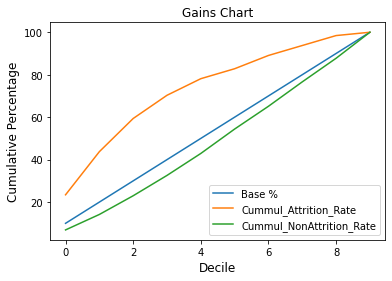

In [1370]:
agg4['Base %'] = [10,20,30,40,50,60,70,80,90,100]
gains = agg4.filter(['Base %','Cummul_Attrition_Rate','Cummul_NonAttrition_Rate'])
gains_chart = gains.plot(kind='line',use_index=False)
gains_chart.set_ylabel("Cumulative Percentage",fontsize=12)
gains_chart.set_xlabel("Decile",fontsize=12)
gains_chart.set_title("Gains Chart")
gains_chart.legend(loc='lower right')

In [ ]:
## 3: Try Random Forest to select features

In [481]:
train=final_data2
train = train.set_index('customer_account_sk') 

df = train.drop(['binary_response'], 1)  ### drop the response variable

X = df.fillna(0)

Y = train.binary_response

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

In [482]:
from sklearn.ensemble import RandomForestRegressor

In [483]:
# Create correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.9)]
len(to_drop)

22

In [484]:
model = RandomForestRegressor(random_state=1, max_depth=10)

In [485]:
train2 = train.drop(columns = to_drop)
train2.shape

(1297, 35)

In [486]:
df = train2.drop(['binary_response'], 1)  ### drop the response variable

In [487]:
df2 = df.fillna(0)

In [488]:
model.fit(df2, train.binary_response)

RandomForestRegressor(max_depth=10, random_state=1)

In [489]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 15 features
indices2 = np.argsort(importances)[-30:]  # top 30 features

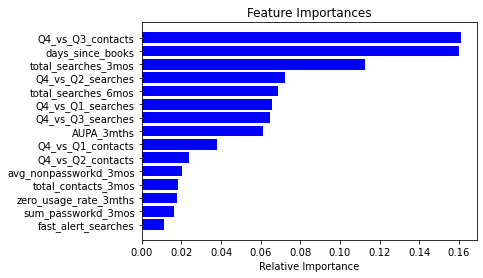

In [490]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [491]:
rf_top15_var = [features[i] for i in indices]
rf_top30_var = [features[i] for i in indices2]

In [492]:
### 3.1 Train top 15 random forest selected features 

In [493]:
x=X_train[rf_top30_var]
x2 = x.fillna(0)

In [494]:
# Create correlation matrix
corr_matrix = x2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]
len(to_drop)

1

In [495]:
x3=x2.drop(columns = to_drop)
x3.shape

(972, 29)

In [496]:
import operator
import statsmodels.api as sm
import pandas as pd
def remove_most_insignificant(df, results):
    # use operator to find the key which belongs to the maximum value in the dictionary:
    max_p_value = max(results.pvalues.iteritems(), key=operator.itemgetter(1))[0]
    # this is the feature you want to drop:
    df.drop(columns = max_p_value, inplace = True)
    return df

In [497]:
X = x3
y = y_train

In [498]:
insignificant_feature = True
while insignificant_feature:
        results = sm.Logit(y.astype(float),X.astype(float)).fit()
        significant = [p_value < 0.05 for p_value in results.pvalues]
        if all(significant):
            insignificant_feature = False
        else:
            if X.shape[1] == 1:  # if there's only one insignificant variable left
                print('No significant features found')
                results = None
                insignificant_feature = False
            else:            
                X = remove_most_insignificant(X, results)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.379475
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.379476
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.379487
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.379510
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.379538
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.379577
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.379668
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.379800
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.379869
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.

In [1038]:
comb_col = ['fast_alert_contacts',
  'fast_alert_searches',          
'total_product_3mos',
'sum_account_issues_3mos',
'total_platform_3mths',
'zero_usage_rate_3mths',
'total_contacts_3mos',
'AUPA_3mths',
'total_searches_3mos',
'days_since_books',
'Q4_vs_Q3_contacts',
'sum_billing_issues_3mos']

In [1039]:
x=X_train[comb_col]
x2 = x.fillna(0)

In [1040]:
logit_rf=sm.Logit(y_train.astype(float),x2.astype(float)).fit()
result_rf=logit_rf.summary()
result_rf

Optimization terminated successfully.
         Current function value: 0.383885
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        binary_response   No. Observations:                  972
Model:                          Logit   Df Residuals:                      960
Method:                           MLE   Df Model:                           11
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.2064
Time:                        14:24:17   Log-Likelihood:                -373.14
converged:                       True   LL-Null:                       -470.16
Covariance Type:            nonrobust   LLR p-value:                 1.271e-35
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
fast_alert_contacts         0.9272      0.378      2.450      0.014       0.186       1.669
fast_alert_searches         0.4677      0.254      1.844      0.065      -0.029       0.965
total_product_3mos         -1.0219      0.309     -3.306      0.001      -1.628      -0.416
sum_account_issues_3mos     0.6315      0.223      2.834      0.005       0.195       1.068
total_platform_3mths        0.6087      0.183      3.326      0.001       0.250       0.967
zero_usage_rate_3mths       1.2991      0.353      3.682      0.000       0.608       1.991
total_contacts_3mos        -0.0198      0.007     -2.852      0.004      -0.033      -0.006
AUPA_3mths              -2.136e-05   8.14e-06     -2.626      0.009   -3.73e-05   -5.42e-06
total_searches_3mos      1.328e-06   5.67e-07      2.339      0.019    2.15e-07    2.44e-06
days_since_books           -0.0002   4.49e-05     -3.773      0.000      -0.000   -8.13e-05
Q4_vs_Q3_contacts           2.6233      0.355      7.386      0.000       1.927       3.319
sum_billing_issues_3mos    -0.5231      0.243     -2.149      0.032      -1.000      -0.046
===========================================================================================
"""

In [1041]:
test_final_col = X_test[comb_col]

In [1042]:
y_pred_final = logit_rf.predict(test_final_col)

In [1043]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_final.round(), normalize=True)

0.7876923076923077

In [1044]:
Y_test2 = y_test

In [1045]:
X_test2 = test_final_col

In [1046]:
#First getting my output predicted dataset of the test
X_test_predicted = logit_rf.predict(X_test2.astype(float)) #sm.add_constant to have model with intercept

In [1047]:
predicted_output_dataset = pd.merge(X_test_predicted.rename('predicted_score'), Y_test2, left_index=True, right_index=True, how='outer')

In [1048]:
predicted_output_dataset['nonattritor'] = 1 - predicted_output_dataset.binary_response

In [1049]:
predicted_output_dataset['bucket'] = pd.qcut(predicted_output_dataset.predicted_score, 10)

In [1050]:
predicted_output_dataset_min = predicted_output_dataset.groupby(['bucket']).predicted_score.min().reset_index(name="Minimum_Predicted_Score")
predicted_output_dataset_max = predicted_output_dataset.groupby(['bucket']).predicted_score.max().reset_index(name="Maximum_Predicted_Score")
predicted_output_dataset_attr = predicted_output_dataset.groupby(['bucket']).binary_response.sum().reset_index(name="Num_Attritors")
predicted_output_dataset_attr['Total_Attritors'] = predicted_output_dataset_attr.Num_Attritors.sum()
predicted_output_dataset_nonattr = predicted_output_dataset.groupby(['bucket']).nonattritor.sum().reset_index(name="Num_Non_Attritors")
predicted_output_dataset_nonattr['Total_Non_Attritors'] = predicted_output_dataset_nonattr.Num_Non_Attritors.sum()

In [1051]:
agg1 = pd.merge(predicted_output_dataset_attr, predicted_output_dataset_nonattr, on='bucket', how = 'outer')
agg2 = pd.merge(agg1, predicted_output_dataset_min, on='bucket', how = 'outer')
agg3 = pd.merge(agg2, predicted_output_dataset_max, on='bucket', how = 'outer')
agg3 = agg3.assign(Total_cust = agg1.Total_Attritors + agg1.Total_Non_Attritors) 
agg3['Attrition_Rate'] = agg3.Num_Attritors / agg3.Total_Attritors
agg3['NonAttrition_Rate'] = agg3.Num_Non_Attritors / agg3.Total_Non_Attritors
agg4 = agg3.sort_values(by='Minimum_Predicted_Score', ascending=False)
agg4['Cummul_Attrition_Rate']=(agg4.Attrition_Rate.cumsum()) * 100
agg4['Cummul_NonAttrition_Rate']=(agg4.NonAttrition_Rate.cumsum()) * 100

In [1052]:
agg4['KS'] = np.round(agg4['Cummul_Attrition_Rate']-agg4['Cummul_NonAttrition_Rate'], 3)
Max_KS = agg4.KS.max()

In [1053]:
print('Maximum KS = ', Max_KS)

Maximum KS =  35.8


In [1054]:
agg4

,bucket,Num_Attritors,Total_Attritors,Num_Non_Attritors,Total_Non_Attritors,Minimum_Predicted_Score,Maximum_Predicted_Score,Total_cust,Attrition_Rate,NonAttrition_Rate,Cummul_Attrition_Rate,Cummul_NonAttrition_Rate,KS
9,"(0.456, 0.996]",15,64,18,261,4.571235e-01,0.995681,325,0.234375,0.068966,23.4375,6.896552,16.541
8,"(0.277, 0.456]",13,64,19,261,2.775513e-01,0.453818,325,0.203125,0.072797,43.7500,14.176245,29.574
7,"(0.219, 0.277]",8,64,25,261,2.192872e-01,0.276601,325,0.125000,0.095785,56.2500,23.754789,32.495
6,"(0.174, 0.219]",8,64,24,261,1.740581e-01,0.217796,325,0.125000,0.091954,68.7500,32.950192,35.800
5,"(0.144, 0.174]",4,64,28,261,1.442710e-01,0.173673,325,0.062500,0.107280,75.0000,43.678161,31.322
4,"(0.113, 0.144]",5,64,28,261,1.139827e-01,0.144158,325,0.078125,0.107280,82.8125,54.406130,28.406
3,"(0.0783, 0.113]",4,64,28,261,7.885385e-02,0.112581,325,0.062500,0.107280,89.0625,65.134100,23.928
2,"(0.0434, 0.0783]",2,64,31,261,4.380559e-02,0.078109,325,0.031250,0.118774,92.1875,77.011494,15.176
1,"(0.014, 0.0434]",3,64,29,261,1.414336e-02,0.041634,325,0.046875,0.111111,96.8750,88.122605,8.752
0,"(-0.001, 0.014]",2,64,31,261,7.536100e-22,0.013862,325,0.031250,0.118774,100.0000,100.000000,0.000


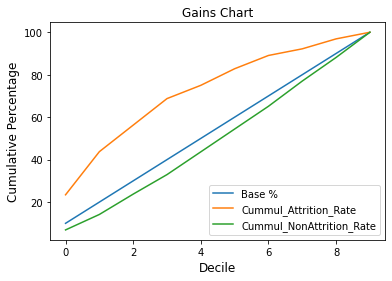

In [1055]:
agg4['Base %'] = [10, 20, 30,40,50,60,70,80,90,100]
gains = agg4.filter(['Base %','Cummul_Attrition_Rate','Cummul_NonAttrition_Rate'])
gains_chart = gains.plot(kind='line',use_index=False)
gains_chart.set_ylabel("Cumulative Percentage",fontsize=12)
gains_chart.set_xlabel("Decile",fontsize=12)
gains_chart.set_title("Gains Chart")
gains_chart.legend(loc='lower right')

In [ ]:
###4. RFE feature selection

In [941]:
train=final_data2
train = train.set_index('customer_account_sk') 

df = train.drop(['binary_response'], 1)  ### drop the response variable

X = df.fillna(0)

Y = train.binary_response

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

In [942]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets

In [943]:
lm = LinearRegression()
rfe = RFE(lm, 9)  
rfe = rfe.fit(df2, train.binary_response)

In [944]:
df2.shape

(1297, 34)

In [945]:
print(rfe.support_)

[ True False False False  True  True False False  True False False False
  True False False False False  True False False False  True False False
 False False False False False False False  True False  True]


In [946]:
print(rfe.ranking_) 

[ 1 19 25 24  1  1 26 12  1 21 22 23  1  8 16 17 18  1 11 10 13  1 20  2
  5  7  6 15  9  4  3  1 14  1]


In [947]:
names = []
for col in df2:
    names.append(col)

In [948]:
print("Features sorted by their rank:")
rankings = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))
rankings

Features sorted by their rank:


[(1, 'Q4_vs_Q3_contacts'),
 (1, 'avg_billing_issues_3mos'),
 (1, 'avg_prod_support_3mos'),
 (1, 'fast_alert_searches'),
 (1, 'sm_min_commitments'),
 (1, 'total_platform_3mths'),
 (1, 'total_platform_6mths'),
 (1, 'total_product_3mos'),
 (1, 'zero_usage_rate_3mths'),
 (2, 'sum_account_issues_3mos'),
 (3, 'avg_nonpassworkd_3mos'),
 (4, 'avg_account_issues_3mos'),
 (5, 'sum_nonpassworkd_3mos'),
 (6, 'sum_prod_support_3mos'),
 (7, 'sum_passworkd_3mos'),
 (8, 'Q4_vs_Q2_contacts'),
 (9, 'sum_billing_issues_3mos'),
 (10, 'fast_alert_contacts'),
 (11, 'slow_alert_searches'),
 (12, 'total_product_6mos'),
 (13, 'slow_alert_contacts'),
 (14, 'avg_tech_issues_3mos'),
 (15, 'sum_tech_issues_3mos'),
 (16, 'Q4_vs_Q1_contacts'),
 (17, 'qt25_contacts_6mos'),
 (18, 'qt25_contacts_12mos'),
 (19, 'total_contacts_3mos'),
 (20, 'days_since_books'),
 (21, 'Q4_vs_Q3_searches'),
 (22, 'Q4_vs_Q2_searches'),
 (23, 'Q4_vs_Q1_searches'),
 (24, 'AUPA_3mths'),
 (25, 'total_searches_3mos'),
 (26, 'total_searches_6mos

In [949]:
top_25_var = list(zip(*rankings))[1][:35]

In [950]:
top_25_var = list(top_25_var)

In [951]:
x=X_train[top_25_var]
x2 = x.fillna(0)

In [952]:
X = x2
y = y_train

In [953]:
insignificant_feature = True
while insignificant_feature:
        results = sm.Logit(y.astype(float),X.astype(float)).fit()
        significant = [p_value < 0.05 for p_value in results.pvalues]
        if all(significant):
            insignificant_feature = False
        else:
            if X.shape[1] == 1:  # if there's only one insignificant variable left
                print('No significant features found')
                results = None
                insignificant_feature = False
            else:            
                X = remove_most_insignificant(X, results)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.376276
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.376278
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.376284
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.376292
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.376313
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.376350
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.376431
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.376515
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.376580
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.

### Feature Combinations

In [981]:
new_var = [
'Q4_vs_Q3_contacts',
'total_platform_3mths',
'total_product_3mos',
'zero_usage_rate_3mths',
'sum_account_issues_3mos',
'sum_billing_issues_3mos',
'fast_alert_contacts',
'fast_alert_searches',
'total_contacts_3mos',
'days_since_books',
'AUPA_3mths',
'total_searches_3mos']


In [982]:
X = X_train[new_var]
y = y_train

In [983]:
logit_rf=sm.Logit(y_train.astype(float),X.astype(float)).fit()
result_rf=logit_rf.summary()
result_rf

Optimization terminated successfully.
         Current function value: 0.383885
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        binary_response   No. Observations:                  972
Model:                          Logit   Df Residuals:                      960
Method:                           MLE   Df Model:                           11
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.2064
Time:                        14:20:51   Log-Likelihood:                -373.14
converged:                       True   LL-Null:                       -470.16
Covariance Type:            nonrobust   LLR p-value:                 1.271e-35
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Q4_vs_Q3_contacts           2.6233      0.355      7.386      0.000       1.927       3.319
total_platform_3mths        0.6087      0.183      3.326      0.001       0.250       0.967
total_product_3mos         -1.0219      0.309     -3.306      0.001      -1.628      -0.416
zero_usage_rate_3mths       1.2991      0.353      3.682      0.000       0.608       1.991
sum_account_issues_3mos     0.6315      0.223      2.834      0.005       0.195       1.068
sum_billing_issues_3mos    -0.5231      0.243     -2.149      0.032      -1.000      -0.046
fast_alert_contacts         0.9272      0.378      2.450      0.014       0.186       1.669
fast_alert_searches         0.4677      0.254      1.844      0.065      -0.029       0.965
total_contacts_3mos        -0.0198      0.007     -2.852      0.004      -0.033      -0.006
days_since_books           -0.0002   4.49e-05     -3.773      0.000      -0.000   -8.13e-05
AUPA_3mths              -2.136e-05   8.14e-06     -2.626      0.009   -3.73e-05   -5.42e-06
total_searches_3mos      1.328e-06   5.67e-07      2.339      0.019    2.15e-07    2.44e-06
===========================================================================================
"""

In [984]:
test_final_col = X_test[new_var]

In [985]:
y_pred_final = logit_rf.predict(test_final_col)

In [986]:
test_final_col.shape

(325, 12)

In [987]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_final.round(), normalize=True)

0.7876923076923077

In [988]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds =metrics.roc_curve(y_test, y_pred_final)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.726473


In [989]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
61,0.306513,0.6875,0.693487,-0.005987,0.185048


In [990]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_final.round()))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       261
           1       0.38      0.12      0.19        64

    accuracy                           0.79       325
   macro avg       0.60      0.54      0.53       325
weighted avg       0.73      0.79      0.74       325



In [991]:
Y_test3 = y_test

In [992]:
X_test3 = test_final_col

In [993]:
#First getting my output predicted dataset of the test
X_test_predicted = logit_rf.predict(X_test3.astype(float)) #sm.add_constant to have model with intercept

In [994]:
predicted_output_dataset = pd.merge(X_test_predicted.rename('predicted_score'), Y_test3, left_index=True, right_index=True, how='outer')

In [995]:
predicted_output_dataset.head()

,predicted_score,binary_response
customer_account_sk,,
1006888,0.044832,0
217502,0.127023,0
965250,0.183267,0
668874,0.144158,1
150577,0.003337,1


In [996]:
predicted_output_dataset['nonattritor'] = 1 - predicted_output_dataset.binary_response

In [997]:
predicted_output_dataset['bucket'] = pd.qcut(predicted_output_dataset.predicted_score, 10)

In [998]:
predicted_output_dataset_min = predicted_output_dataset.groupby(['bucket']).predicted_score.min().reset_index(name="Minimum_Predicted_Score")
predicted_output_dataset_max = predicted_output_dataset.groupby(['bucket']).predicted_score.max().reset_index(name="Maximum_Predicted_Score")
predicted_output_dataset_attr = predicted_output_dataset.groupby(['bucket']).binary_response.sum().reset_index(name="Num_Attritors")
predicted_output_dataset_attr['Total_Attritors'] = predicted_output_dataset_attr.Num_Attritors.sum()
predicted_output_dataset_nonattr = predicted_output_dataset.groupby(['bucket']).nonattritor.sum().reset_index(name="Num_Non_Attritors")
predicted_output_dataset_nonattr['Total_Non_Attritors'] = predicted_output_dataset_nonattr.Num_Non_Attritors.sum()

In [999]:
agg1 = pd.merge(predicted_output_dataset_attr, predicted_output_dataset_nonattr, on='bucket', how = 'outer')
agg2 = pd.merge(agg1, predicted_output_dataset_min, on='bucket', how = 'outer')
agg3 = pd.merge(agg2, predicted_output_dataset_max, on='bucket', how = 'outer')
agg3 = agg3.assign(Total_cust = agg1.Total_Attritors + agg1.Total_Non_Attritors) 
agg3['Attrition_Rate'] = agg3.Num_Attritors / agg3.Total_Attritors
agg3['NonAttrition_Rate'] = agg3.Num_Non_Attritors / agg3.Total_Non_Attritors
agg4 = agg3.sort_values(by='Minimum_Predicted_Score', ascending=False)
agg4['Cummul_Attrition_Rate']=(agg4.Attrition_Rate.cumsum()) * 100
agg4['Cummul_NonAttrition_Rate']=(agg4.NonAttrition_Rate.cumsum()) * 100

In [1000]:
agg4['KS'] = np.round(agg4['Cummul_Attrition_Rate']-agg4['Cummul_NonAttrition_Rate'], 3)
Max_KS = agg4.KS.max()

In [1001]:
print('Maximum KS = ', Max_KS)

Maximum KS =  35.8


In [1002]:
agg4

,bucket,Num_Attritors,Total_Attritors,Num_Non_Attritors,Total_Non_Attritors,Minimum_Predicted_Score,Maximum_Predicted_Score,Total_cust,Attrition_Rate,NonAttrition_Rate,Cummul_Attrition_Rate,Cummul_NonAttrition_Rate,KS
9,"(0.456, 0.996]",15,64,18,261,4.571235e-01,0.995681,325,0.234375,0.068966,23.4375,6.896552,16.541
8,"(0.277, 0.456]",13,64,19,261,2.775513e-01,0.453818,325,0.203125,0.072797,43.7500,14.176245,29.574
7,"(0.219, 0.277]",8,64,25,261,2.192872e-01,0.276601,325,0.125000,0.095785,56.2500,23.754789,32.495
6,"(0.174, 0.219]",8,64,24,261,1.740581e-01,0.217796,325,0.125000,0.091954,68.7500,32.950192,35.800
5,"(0.144, 0.174]",4,64,28,261,1.442710e-01,0.173673,325,0.062500,0.107280,75.0000,43.678161,31.322
4,"(0.113, 0.144]",5,64,28,261,1.139827e-01,0.144158,325,0.078125,0.107280,82.8125,54.406130,28.406
3,"(0.0783, 0.113]",4,64,28,261,7.885385e-02,0.112581,325,0.062500,0.107280,89.0625,65.134100,23.928
2,"(0.0434, 0.0783]",2,64,31,261,4.380559e-02,0.078109,325,0.031250,0.118774,92.1875,77.011494,15.176
1,"(0.014, 0.0434]",3,64,29,261,1.414336e-02,0.041634,325,0.046875,0.111111,96.8750,88.122605,8.752
0,"(-0.001, 0.014]",2,64,31,261,7.536100e-22,0.013862,325,0.031250,0.118774,100.0000,100.000000,0.000


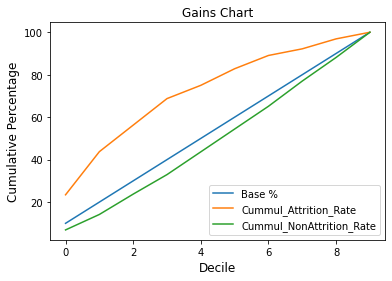

In [1003]:
agg4['Base %'] = [10,20,30,40,50,60,70,80,90,100]
gains = agg4.filter(['Base %','Cummul_Attrition_Rate','Cummul_NonAttrition_Rate'])
gains_chart = gains.plot(kind='line',use_index=False)
gains_chart.set_ylabel("Cumulative Percentage",fontsize=12)
gains_chart.set_xlabel("Decile",fontsize=12)
gains_chart.set_title("Gains Chart")
gains_chart.legend(loc='lower right')

In [ ]:
###All model combinations 

In [1371]:
all_var = ['AUPA_3mths',
'days_since_books',
'fast_alert_contacts',
'fast_alert_searches',
'Q4_vs_Q3_contacts',
'qt25_contacts_6mos',
'sum_account_issues_3mos',
'sum_billing_issues_3mos',
'sum_passworkd_3mos',
'total_platform_3mths',
'total_platform_6mths',
'total_product_3mos',
'total_searches_3mos',
'total_searches_6mos',
'zero_usage_rate_3mths']

In [1372]:
train=final_data2
train = train.set_index('customer_account_sk') 

df = train.drop(['binary_response'], 1)  ### drop the response variable

X = df.fillna(0)

Y = train.binary_response

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

In [1373]:
X_train.head()

,zero_usage_rate_3mths,zero_usage_rate_6mths,zero_usage_rate_9mths,total_contacts_3mos,total_searches_3mos,AUPA_3mths,total_product_3mos,total_platform_3mths,total_contacts_6mos,total_searches_6mos,...,sum_passworkd_3mos,sum_prod_support_3mos,sum_tech_issues_3mos,sum_billing_issues_3mos,avg_account_issues_3mos,avg_nonpassworkd_3mos,avg_passworkd_3mos,avg_prod_support_3mos,avg_tech_issues_3mos,avg_billing_issues_3mos
customer_account_sk,,,,,,,,,,,,,,,,,,,,,
167228,0.0,0.0,0.0,3.0,264.0,88.000000,1.0,1.0,6.0,762.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1702054,0.0,0.0,0.0,22.0,11272.0,512.363636,1.0,2.0,42.0,22160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169562,0.0,0.0,0.0,64.0,336.0,5.250000,1.0,2.0,146.0,1322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74573,0.0,0.0,0.0,28.0,26162.0,934.357143,1.0,2.0,58.0,66264.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235656,0.0,0.0,0.0,54.0,5712.0,105.777778,1.0,2.0,112.0,12754.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1374]:
X = X_train[all_var]
y = y_train

In [1375]:
insignificant_feature = True
while insignificant_feature:
        results = sm.Logit(y.astype(float),X.astype(float)).fit()
        significant = [p_value < 0.05 for p_value in results.pvalues]
        if all(significant):
            insignificant_feature = False
        else:
            if X.shape[1] == 1:  # if there's only one insignificant variable left
                print('No significant features found')
                results = None
                insignificant_feature = False
            else:            
                X = remove_most_insignificant(X, results)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.382356
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.382389
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.382701
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.383853
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.384794
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.386586
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:        binary_response   No. Observations:                  972
Model:                          Logit   Df Residuals:                      962
Method:                           MLE   Df Model:                            9
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                 

/var/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Try the Xboost 

In [1564]:
all_var = ['AUPA_3mths',
'days_since_books',
'fast_alert_contacts',
'fast_alert_searches',
'Q4_vs_Q3_contacts',
'qt25_contacts_6mos',
'sum_account_issues_3mos',
'sum_billing_issues_3mos',
'sum_passworkd_3mos',
'total_product_3mos',
'total_searches_3mos',
'total_searches_6mos',
'zero_usage_rate_3mths']

In [1571]:
train=final_data2
train = train.set_index('customer_account_sk') 

df = train.drop(['binary_response'], 1)  ### drop the response variable

X = df.fillna(0)

Y = train.binary_response

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

In [1572]:
# monitor training performance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from operator import itemgetter

In [1573]:
def build_xgboost(X_train, y_train, X_test, y_test, n_iter):
    """
    random search hyperparameter tuning for xgboost
    classification task, n_iter controls the number
    of hyperparameter combinations that it will search for
    """
    # xgboost base parameter:
    xgb_param_fixed = {        
        # setting it to a positive value 
        # might help when class is extremely imbalanced
        # as it makes the update more conservative
        'max_delta_step': 1,
            
        # use all possible cores for training
        'n_jobs': -1,
        
        # set number of estimator to a large number
        # and the learning rate to be a small number,
        # we'll let early stopping decide when to stop
        'n_estimators': 300,
        'learning_rate': 0.1}
    xgb_base = XGBClassifier(**xgb_param_fixed)

    # random search's parameter:
    # scikit-learn's random search works with distributions; 
    # but it must provide a rvs method for sampling values from it,
    # such as those from scipy.stats.distributions
    # randint: discrete random variables ranging from low to high
    # uniform: uniform continuous random variable between loc and loc + scale
    xgb_param_options = {
        'max_depth': randint(low = 3, high = 15),
        'colsample_bytree': uniform(loc = 0.7, scale = 0.3),
        'subsample': uniform(loc = 0.7, scale = 0.3)}
    
    eval_set = [(X_train, y_train), (X_test, y_test)]
    xgb_fit_params = {   
        'eval_metric': 'auc', 
        'eval_set': eval_set,
        'early_stopping_rounds': 5,
        'verbose': False}

    model_xgb = RandomizedSearchCV(
        estimator = xgb_base,
        param_distributions = xgb_param_options,
        cv = 10,   
        
        # number of parameter settings that are sampled
        n_iter = n_iter,
        
        # n_jobs can be a parameter (since it's a fast task
        # for this toy dataset, we'll simply we using 1 jobs)
        n_jobs = 1,
        verbose = 1
    ).fit(X_train, y_train, **xgb_fit_params)
    
    print('Best score obtained: {0}'.format(model_xgb.best_score_))
    print('Best Parameters:')
    for param, value in model_xgb.best_params_.items():
        print('\t{}: {}'.format(param, value))
    
    return model_xgb.best_estimator_

In [1574]:
import warnings
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# temporary fix for the issue raised in the following link,
# will likely be removed in the next version
# https://github.com/scikit-learn/scikit-learn/issues/10449
warnings.filterwarnings(
    action = 'ignore', module = 'sklearn')

xgb_model = build_xgboost(X_train, y_train, X_test, y_test, n_iter = 15)
ntree_limit = xgb_model.best_ntree_limit
y_pred_prob = xgb_model.predict_proba(X_test, ntree_limit = ntree_limit)[:, 1]
print('auc:', roc_auc_score(y_test, y_pred_prob))

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score obtained: 0.8436145592257522
Best Parameters:
	colsample_bytree: 0.9975140063128096
	max_depth: 8
	subsample: 0.7212862170431337
auc: 0.7586206896551724


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   17.1s finished


In [1575]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [1631]:
xgb_params_fixed = {
    'learning_rate': 0.1,
    
    # use 'multi:softprob' for multi-class problems
    'objective': 'binary:logistic',
    
    # length of the longest path from a root to a leaf
    'max_depth': 5,
    
    # subsample ratio of columns when constructing each tree
    'colsample_bytree': 0.8001129736771523,
    
    # setting it to a positive value 
    # might help when class is extremely imbalanced
    # as it makes the update more conservative
    'max_delta_step': 1, 
    'n_estimators': 150,
    
    # use all possible cores for training
    'n_jobs': -1
}

In [1632]:
xgb_tree = XGBClassifier(**xgb_params_fixed)

In [1633]:
#xgb_tree = xgb_tree.fit(x_train, y_train,eval_metric=["error", "logloss", "auc"], eval_set=eval_set, verbose=True)
#xgb_tree.fit(x_train, y_train,eval_metric=["error", "logloss", "auc"], eval_set=eval_set, verbose = False)
xgb_tree.fit(X_train, y_train,eval_metric=["error", "logloss", "auc"], eval_set=eval_set,early_stopping_rounds = 10, verbose = 10)

[0]	validation_0-error:0.12654	validation_0-logloss:0.65732	validation_0-auc:0.70987	validation_1-error:0.17539	validation_1-logloss:0.66246	validation_1-auc:0.63691
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[10]	validation_0-error:0.10288	validation_0-logloss:0.41554	validation_0-auc:0.86936	validation_1-error:0.17539	validation_1-logloss:0.48170	validation_1-auc:0.75317
[20]	validation_0-error:0.10288	validation_0-logloss:0.32072	validation_0-auc:0.94211	validation_1-error:0.19077	validation_1-logloss:0.43443	validation_1-auc:0.75192
Stopping. Best iteration:
[12]	validation_0-error:0.10185	validation_0-logloss:0.39061	validation_0-auc:0.89482	validation_1-error:0.17846	validation_1-logloss:0.46662	validation_1-auc:0.76069



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8001129736771523, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=1, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1634]:
def plot_xgboost_importance(xgb_tree, feature_names, threshold = 5):
    """
    Improvements on xgboost's plot_importance function, where 
    1. the importance are scaled relative to the max importance, and 
    number that are below 5% of the max importance will be chopped off
    2. we need to supply the actual feature name so the label won't 
    just show up as feature 1, feature 2, which are not very interpretable
    
    returns the important features's index sorted in descending order
    """
    # convert from dictionary to tuples and sort by the
    # importance score in ascending order for plotting purpose
    importance = xgb_tree.get_booster().get_score(importance_type = 'gain')
    #tuples = [(int(k[1:]), importance[k]) for k in importance]
    #tuples = sorted(tuples, key = itemgetter(1))
    labels, values = list(importance.keys()), list(importance.values())

    # make importances relative to max importance,
    # and filter out those that have smaller than 5%
    # relative importance (threshold chosen arbitrarily)
    labels, values = np.asarray(labels), np.asarray(values)
    values = np.round(100 * values / np.max(values), 2)
    mask = values > threshold
    labels, values = labels[mask], values[mask]
    feature_labels =labels
    
    ylocs = np.arange(values.shape[0])
    plt.barh(ylocs, values, align = 'center')
    for x, y in zip(values, ylocs):
        plt.text(x + 1, y, x, va = 'center')

    plt.ylabel('Features')
    plt.xlabel('Relative Importance Score')
    plt.title('Feature Importance Score')
    plt.xlim([0, 110])
    plt.yticks(ylocs, feature_labels)
    
    # revert the ordering of the importance
    return labels[::-1]

array(['avg_tech_issues_3mos', 'sum_contacts_QT1', 'avg_contacts_3mos',
       'sum_nonpassworkd_3mos', 'total_platform_6mths',
       'fast_alert_contacts', 'slow_alert_searches', 'qt25_searches_6mos',
       'total_platform_3mths', 'avg_account_issues_3mos',
       'Q4_vs_Q1_contacts', 'total_contacts_9mos', 'AUPA_3mths',
       'sum_contacts_QT3', 'sum_passworkd_3mos', 'AUPA_6mths',
       'avg_nonpassworkd_3mos', 'Q4_vs_Q1_searches',
       'sum_account_issues_3mos', 'zero_usage_rate_3mths',
       'sum_searches_QT1', 'total_searches_9mos', 'avg_searches_3mos',
       'days_since_books', 'Q4_vs_Q2_contacts', 'total_searches_6mos',
       'AUPA_9mths', 'sum_searches_QT3', 'zero_usage_rate_6mths',
       'sum_tech_issues_3mos', 'Q4_vs_Q2_searches', 'Q4_vs_Q3_searches',
       'sum_searches_QT4', 'avg_contacts_6mos', 'qt25_searches_12mos',
       'sum_searches_QT2', 'total_searches_3mos', 'Q4_vs_Q3_contacts'],
      dtype='<U23')

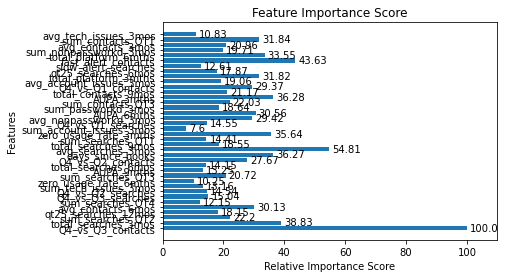

In [1635]:
feature_names = np.arange(X_train.shape[1])
plot_xgboost_importance(xgb_tree = xgb_tree, feature_names = feature_names)

In [1636]:
# make predictions for test data
y_pred = xgb_tree.predict_proba(X_test, ntree_limit = ntree_limit)[:, 1]

In [1637]:
predictions = [round(value) for value in y_pred]

In [1638]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.85%


In [1639]:
from matplotlib import pyplot

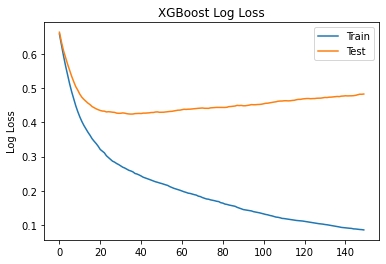

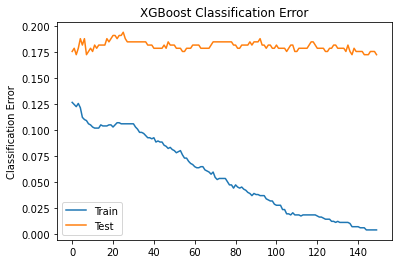

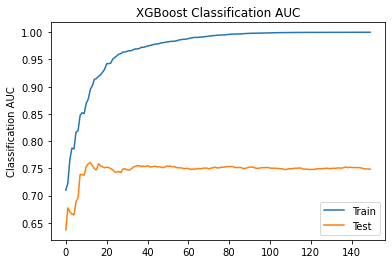

In [1640]:
# retrieve performance metrics
#xgb_tree.fit(x_train, y_train,eval_metric=["error", "logloss", "auc"], eval_set=eval_set,early_stopping_rounds = 10, verbose = 10)
#xgb_tree = xgb_tree.fit(x_train, y_train,eval_metric=["error", "logloss", "auc"], eval_set=eval_set, verbose=True)
xgb_tree.fit(X_train, y_train,eval_metric=["error", "logloss", "auc"], eval_set=eval_set, verbose = False)
results = xgb_tree.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

# plot AUC
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('Classification AUC')
pyplot.title('XGBoost Classification AUC')
pyplot.show()

In [1641]:
#First getting my output predicted dataset of the test
X_test_predicted = xgb_tree.predict_proba(X_test, ntree_limit = ntree_limit)[:, 1]

In [1642]:
X_test_predicted = pd.DataFrame(X_test_predicted)

In [1643]:
X_test_predicted

,0
0,0.301515
1,0.197339
2,0.199614
3,0.195264
4,0.197491
...,...
320,0.155195
321,0.198401
322,0.155195
323,0.200670


In [1644]:
y_test2 = y_test.reset_index()

In [1645]:
frames = [X_test_predicted, y_test2]

In [1646]:
xgboost_output = pd.concat(frames,axis=1, sort=False)

In [1647]:
xgboost_output

,0,customer_account_sk,binary_response
0,0.301515,1006888,0
1,0.197339,217502,0
2,0.199614,965250,0
3,0.195264,668874,1
4,0.197491,150577,1
...,...,...,...
320,0.155195,117865,0
321,0.198401,100390,0
322,0.155195,89001,0
323,0.200670,1688470,0


In [1648]:
xgboost_output.columns = ['predicted_score','customer_account_sk', 'binary_response']

In [1649]:
xgboost_output.head()

,predicted_score,customer_account_sk,binary_response
0,0.301515,1006888,0
1,0.197339,217502,0
2,0.199614,965250,0
3,0.195264,668874,1
4,0.197491,150577,1


In [1650]:
xgboost_output['nonattritor'] = 1 - xgboost_output.binary_response

In [1652]:
xgboost_output['bucket'] = pd.qcut(xgboost_output.predicted_score, 10)

In [1653]:
xgboost_output_min = xgboost_output.groupby(['bucket']).predicted_score.min().reset_index(name="Minimum_Predicted_Score")
xgboost_output_max = xgboost_output.groupby(['bucket']).predicted_score.max().reset_index(name="Maximum_Predicted_Score")
xgboost_output_attr = xgboost_output.groupby(['bucket']).binary_response.sum().reset_index(name="Num_Attritors")
xgboost_output_attr['Total_Attritors'] = xgboost_output_attr.Num_Attritors.sum()
xgboost_output_nonattr = xgboost_output.groupby(['bucket']).nonattritor.sum().reset_index(name="Num_Non_Attritors")
xgboost_output_nonattr['Total_Non_Attritors'] = xgboost_output_nonattr.Num_Non_Attritors.sum()

In [1654]:
agg5 = pd.merge(xgboost_output_attr, xgboost_output_nonattr, on='bucket', how = 'outer')
agg6 = pd.merge(agg5, xgboost_output_min, on='bucket', how = 'outer')
agg7 = pd.merge(agg6, xgboost_output_max, on='bucket', how = 'outer')
agg7 = agg7.assign(Total_cust = agg5.Total_Attritors + agg5.Total_Non_Attritors) 
agg7['Attrition_Rate'] = agg7.Num_Attritors / agg7.Total_Attritors
agg7['NonAttrition_Rate'] = agg7.Num_Non_Attritors / agg7.Total_Non_Attritors
agg8 = agg7.sort_values(by='Minimum_Predicted_Score', ascending=False)
agg8['Cummul_Attrition_Rate']=(agg8.Attrition_Rate.cumsum()) * 100
agg8['Cummul_NonAttrition_Rate']=(agg8.NonAttrition_Rate.cumsum()) * 100

In [1655]:
agg8['KS'] = np.round(agg8['Cummul_Attrition_Rate']-agg8['Cummul_NonAttrition_Rate'], 3)
Max_KS = agg8.KS.max()

In [1656]:
Max_KS

36.386

In [1658]:
agg8.index = [1,2,3,4,5,6,7,8,9,10]

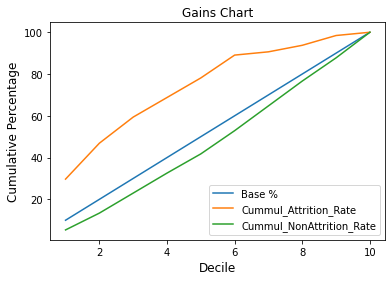

In [1659]:
agg8['Base %'] = [10, 20,30,40,50,60,70,80,90,100]
gains = agg8.filter(['Base %','Cummul_Attrition_Rate','Cummul_NonAttrition_Rate'])
gains_chart = gains.plot(kind='line',use_index=True)
gains_chart.set_ylabel("Cumulative Percentage",fontsize=12)
gains_chart.set_xlabel("Decile",fontsize=12)
gains_chart.set_title("Gains Chart")
gains_chart.legend(loc='lower right')

In [1664]:
import matplotlib.pyplot as plt

gains_chart.figure.savefig('xgboost.png')
